# Uploading all the required files

In [37]:
#Uploading all the required files
from google.colab import files
import io

uploaded = files.upload()
for filename in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

Saving dataset_T70.csv to dataset_T70.csv
Saving dataset_T80.csv to dataset_T80.csv
Saving dataset_T90.csv to dataset_T90.csv
Uploaded file "dataset_T70.csv" with length 6625931 bytes
Uploaded file "dataset_T80.csv" with length 6619011 bytes
Uploaded file "dataset_T90.csv" with length 6625931 bytes


# Importing libraries


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ( accuracy_score, roc_auc_score, average_precision_score,brier_score_loss, confusion_matrix, classification_report, roc_curve)


# Load the data from dataset_T90.csv
Loading the data from the CSV file into a pandas DataFrame.
## Inspect the data
Display the first few rows of the DataFrame, checking data types, and looking for missing values.
## Summarize the data
Generate statistics for numerical and categorical columns.

In [39]:
#Reading the dataset
df = pd.read_csv('dataset_T90.csv')
display(df.head())
df.info()
display(df.isnull().sum())
display(df.describe())
display(df.describe(include='object'))

,FullName,Email,Phone,Address,JobTitle,DateOfBirth,Age,Gender,Marriage,Children,...,Apps_RiskyCount,Target(Creditworthy),drivers_pos_count,drivers_neg_count,drivers_pos_ratio,drivers_positive_features,drivers_negative_features,adj_pos_ratio_T90,target_T90,target
0,Karen Thompson,wmorse@hotmail.com,+1-718-333-1390x128,"1013 Garcia Causeway Apt. 881, Port Jaime, VT ...",Theatre director,2006-07-23,18,Female,Married,1,...,4,0,14,6,0.70,"CallsMinutes,Apps_Time_GamingMin,SmsSent,Calls...","SMSTx_Amt_Mean_30d,Apps_TotalInstalled,SM_Post...",0.630,1,1
1,Jeremy Case,charles24@hotmail.com,+1-720-559-8988x9286,"1969 Katherine Walk Apt. 538, Eugeneview, MA 3...",Information systems manager,1989-01-05,35,Male,Single,3,...,4,0,8,12,0.40,"Apps_Time_GamingMin,SmsSent,Apps_Time_FinanceM...","CallsMinutes,SMSTx_Amt_Mean_30d,CallsNum,Apps_...",0.360,0,0
2,Laura Mcdaniel,erin25@hotmail.com,(539)272-1823x6598,"8019 Gonzalez Divide, Port Erin, VA 41799",Manufacturing engineer,1995-01-05,29,Male,Single,3,...,0,0,11,9,0.55,"Apps_Time_GamingMin,SmsSent,SM_PostsPerWeek,SM...","CallsMinutes,SMSTx_Amt_Mean_30d,CallsNum,Apps_...",0.495,0,0
3,John Green,hollysims@gmail.com,(690)509-1995x434,"699 Rivera Crest Apt. 924, West Jesseberg, NM ...",Audiological scientist,2003-08-16,21,Male,Single,2,...,4,1,13,7,0.65,"CallsMinutes,SmsSent,Apps_Time_FinanceMin,SM_P...","Apps_Time_GamingMin,SMSTx_Amt_Mean_30d,CallsNu...",0.585,1,1
4,Jeffrey Hampton,fwilliams@yahoo.com,786-778-5141,"0897 Heather Squares, Port Donnafurt, MO 46349","Scientist, physiological",2006-01-19,18,Male,Single,2,...,1,1,11,9,0.55,"Apps_Time_GamingMin,SMSTx_Amt_Mean_30d,Apps_To...","CallsMinutes,SmsSent,CallsNum,Apps_Time_Financ...",0.495,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FullName                   10000 non-null  object 
 1   Email                      10000 non-null  object 
 2   Phone                      10000 non-null  object 
 3   Address                    10000 non-null  object 
 4   JobTitle                   10000 non-null  object 
 5   DateOfBirth                10000 non-null  object 
 6   Age                        10000 non-null  int64  
 7   Gender                     10000 non-null  object 
 8   Marriage                   10000 non-null  object 
 9   Children                   10000 non-null  int64  
 10  FamilySize                 10000 non-null  int64  
 11  Education                  10000 non-null  object 
 12  Income                     10000 non-null  int64  
 13  HouseOwn                   10000 non-null  int6

,0
FullName,0
Email,0
Phone,0
Address,0
JobTitle,0
DateOfBirth,0
Age,0
Gender,0
Marriage,0
Children,0


,Age,Children,FamilySize,Income,HouseOwn,CarOwn,CallsNum,CallsMinutes,SmsSent,SmsVar,...,Apps_Time_FinanceMin,Apps_ChurnRate_30d,Apps_RiskyCount,Target(Creditworthy),drivers_pos_count,drivers_neg_count,drivers_pos_ratio,adj_pos_ratio_T90,target_T90,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.489600,1.469900,2.972700,3349.512800,0.390700,0.307600,34.688300,48.234800,34.212600,0.001684,...,22.859000,0.152955,1.7840,0.500000,11.259600,8.740400,0.562980,0.506682,0.459000,0.459000
std,11.177996,1.217556,1.318609,1784.597762,0.487932,0.461523,21.778218,32.505306,21.880038,1.001769,...,20.511528,0.094334,1.6671,0.500025,2.152411,2.152411,0.107621,0.096858,0.498341,0.498341
min,18.000000,0.000000,1.000000,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.770000,...,0.000000,0.000000,0.0000,0.000000,3.000000,1.000000,0.150000,0.135000,0.000000,0.000000
25%,27.000000,1.000000,2.000000,2101.000000,0.000000,0.000000,17.000000,22.000000,17.000000,-0.670000,...,3.000000,0.080000,0.0000,0.000000,10.000000,7.000000,0.500000,0.450000,0.000000,0.000000
50%,35.000000,1.000000,3.000000,2977.000000,0.000000,0.000000,33.000000,44.000000,32.000000,-0.000000,...,20.000000,0.150000,2.0000,0.500000,11.000000,9.000000,0.550000,0.495000,0.000000,0.000000
75%,43.000000,2.000000,4.000000,4139.000000,1.000000,1.000000,50.000000,69.000000,49.000000,0.680000,...,37.000000,0.220000,3.0000,1.000000,13.000000,10.000000,0.650000,0.585000,1.000000,1.000000
max,70.000000,8.000000,10.000000,23801.000000,1.000000,1.000000,123.000000,180.000000,132.000000,3.990000,...,119.000000,0.500000,9.0000,1.000000,19.000000,17.000000,0.950000,0.855000,1.000000,1.000000


,FullName,Email,Phone,Address,JobTitle,DateOfBirth,Gender,Marriage,Education,drivers_positive_features,drivers_negative_features
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9374,9783,10000,10000,639,6989,2,3,3,9841,9841
top,Michael Smith,bsmith@gmail.com,426.478.6809x5995,"Unit 2579 Box 4179, DPO AP 17478",Research scientist (maths),2006-11-14,Male,Single,Secondary,"SMSTx_Amt_Mean_30d,SmsSent,CallsNum,Apps_Time_...","CallsMinutes,Apps_Time_GamingMin,SM_Platforms_..."
freq,8,4,1,1,26,8,6183,5027,4945,3,3


## Expolratory Data Analysis
Perform exploratory data analysis (EDA) on the dataset.

### EDA for calls related features

Rows: 10000 | target share: 0.459


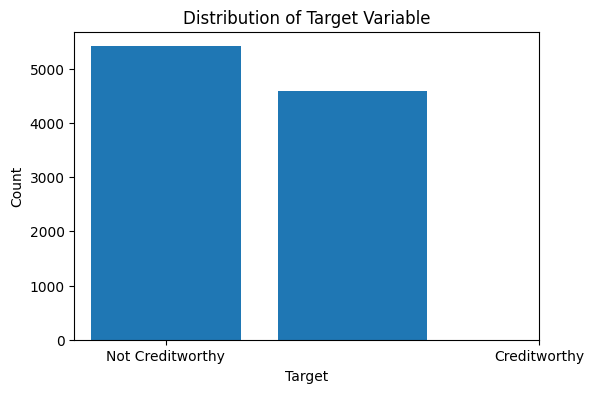

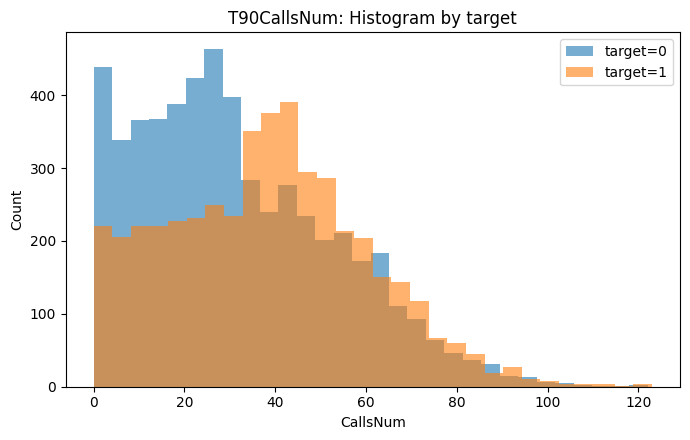

/tmp/ipython-input-1507338254.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


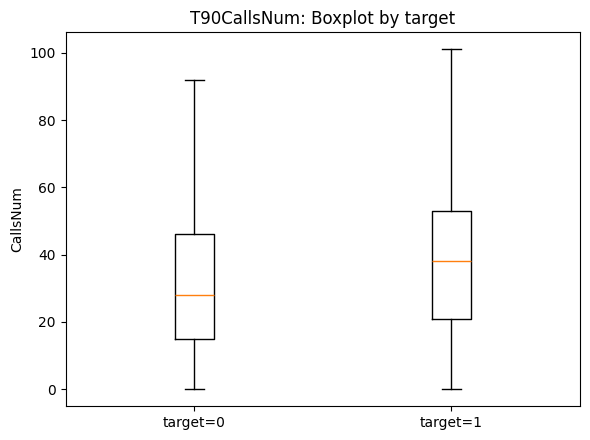

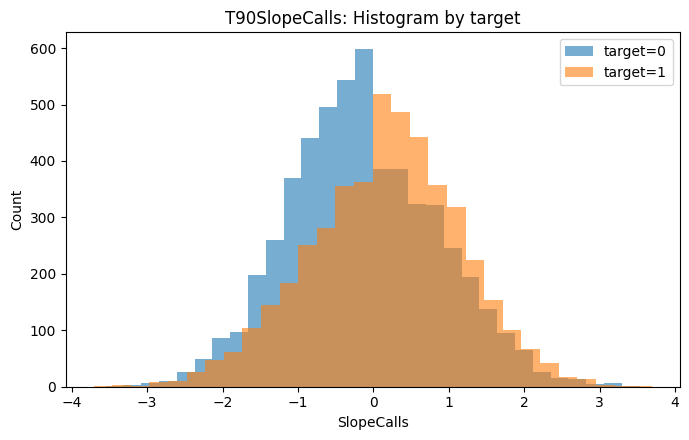

/tmp/ipython-input-1507338254.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


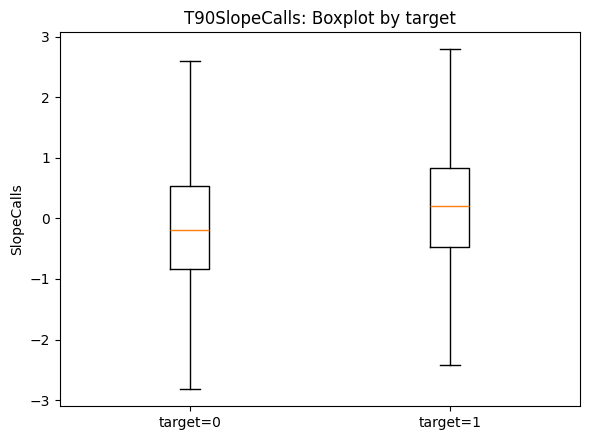

In [40]:
print("Rows:", len(df), "| target share:", round(float(df["target"].mean()), 4))
plt.figure(figsize=(6, 4))
plt.hist(df['target'], bins=2, align='left', rwidth=0.8)
plt.xticks([0, 1], ['Not Creditworthy', 'Creditworthy'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

calls = ["CallsNum", "SlopeCalls"]

for feature in calls:
    # Get data by target
    x0 = df.loc[df["target"]==0, feature].dropna()
    x1 = df.loc[df["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T90{feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T90{feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()




### EDA for transaction related features

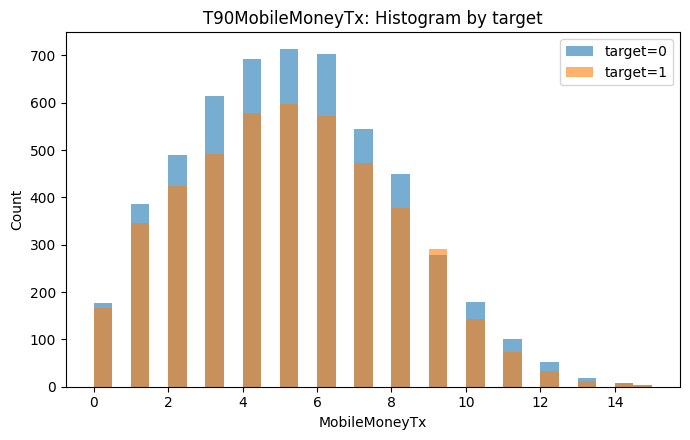

/tmp/ipython-input-384447386.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


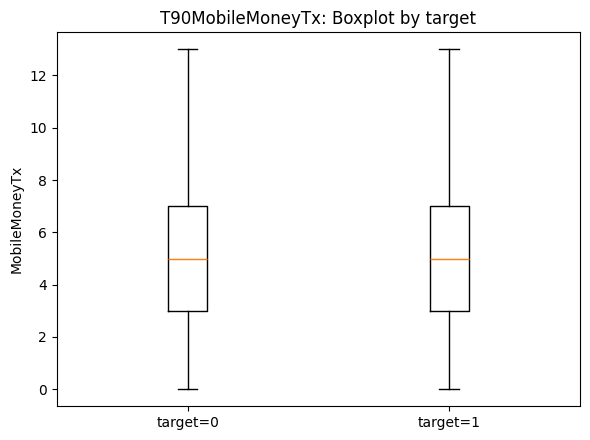

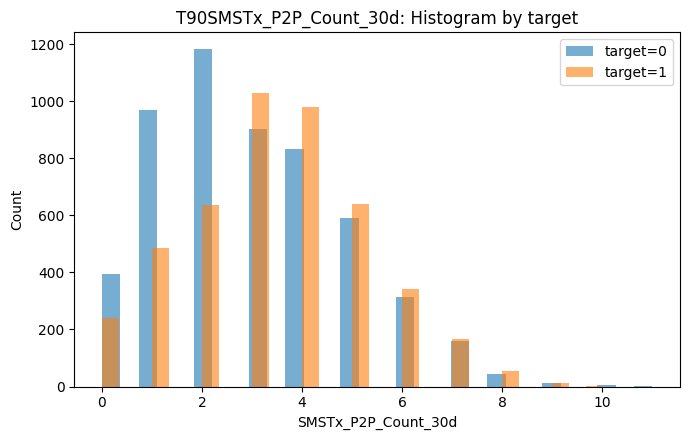

/tmp/ipython-input-384447386.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


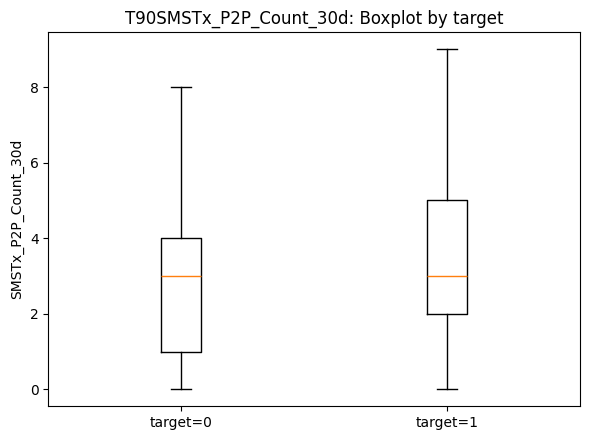

In [41]:
tx = ["MobileMoneyTx", "SMSTx_P2P_Count_30d"]
for feature in tx:
    x0 = df.loc[df["target"]==0, feature].dropna()
    x1 = df.loc[df["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T90{feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T90{feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### EDA for social behaviour related features

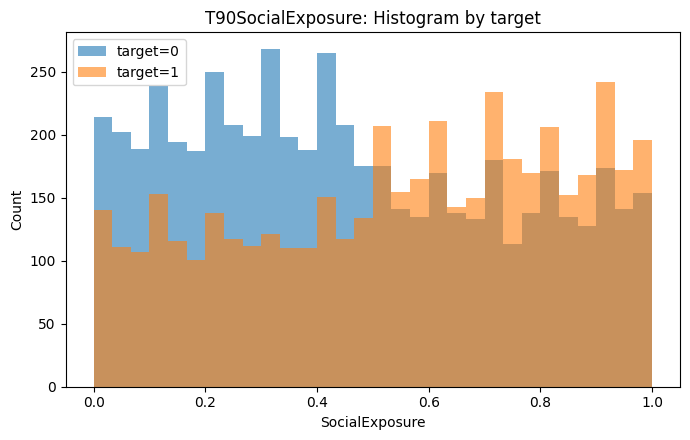

/tmp/ipython-input-594414179.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


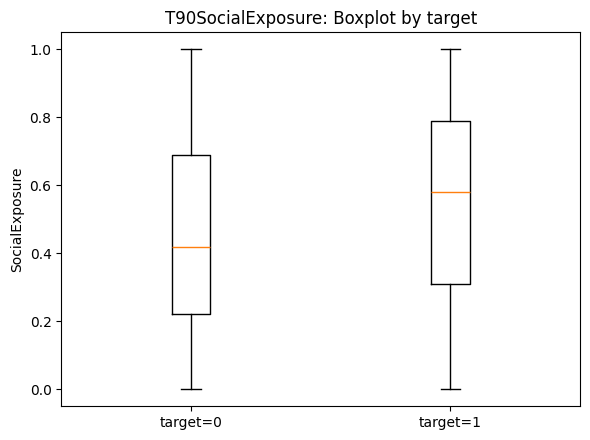

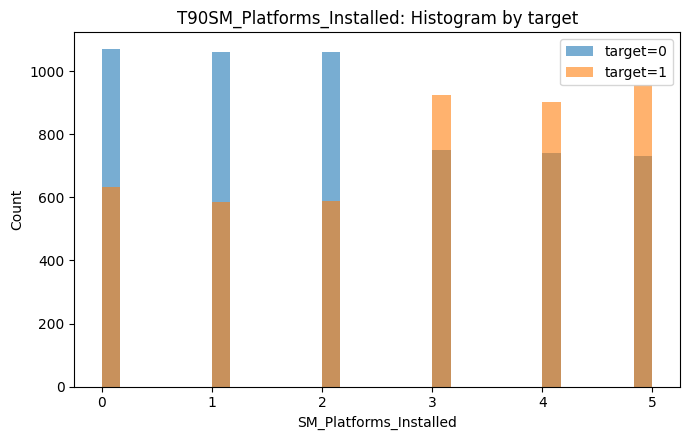

/tmp/ipython-input-594414179.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


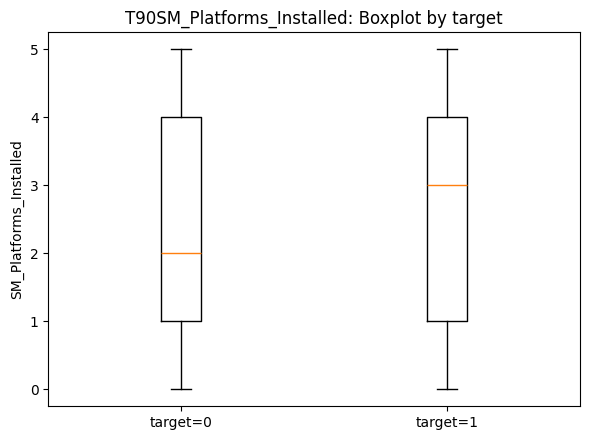

In [42]:
social = ["SocialExposure", "SM_Platforms_Installed"]
for feature in social:

    x0 = df.loc[df["target"]==0, feature].dropna()
    x1 = df.loc[df["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T90{feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T90{feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### HeatMap for T90

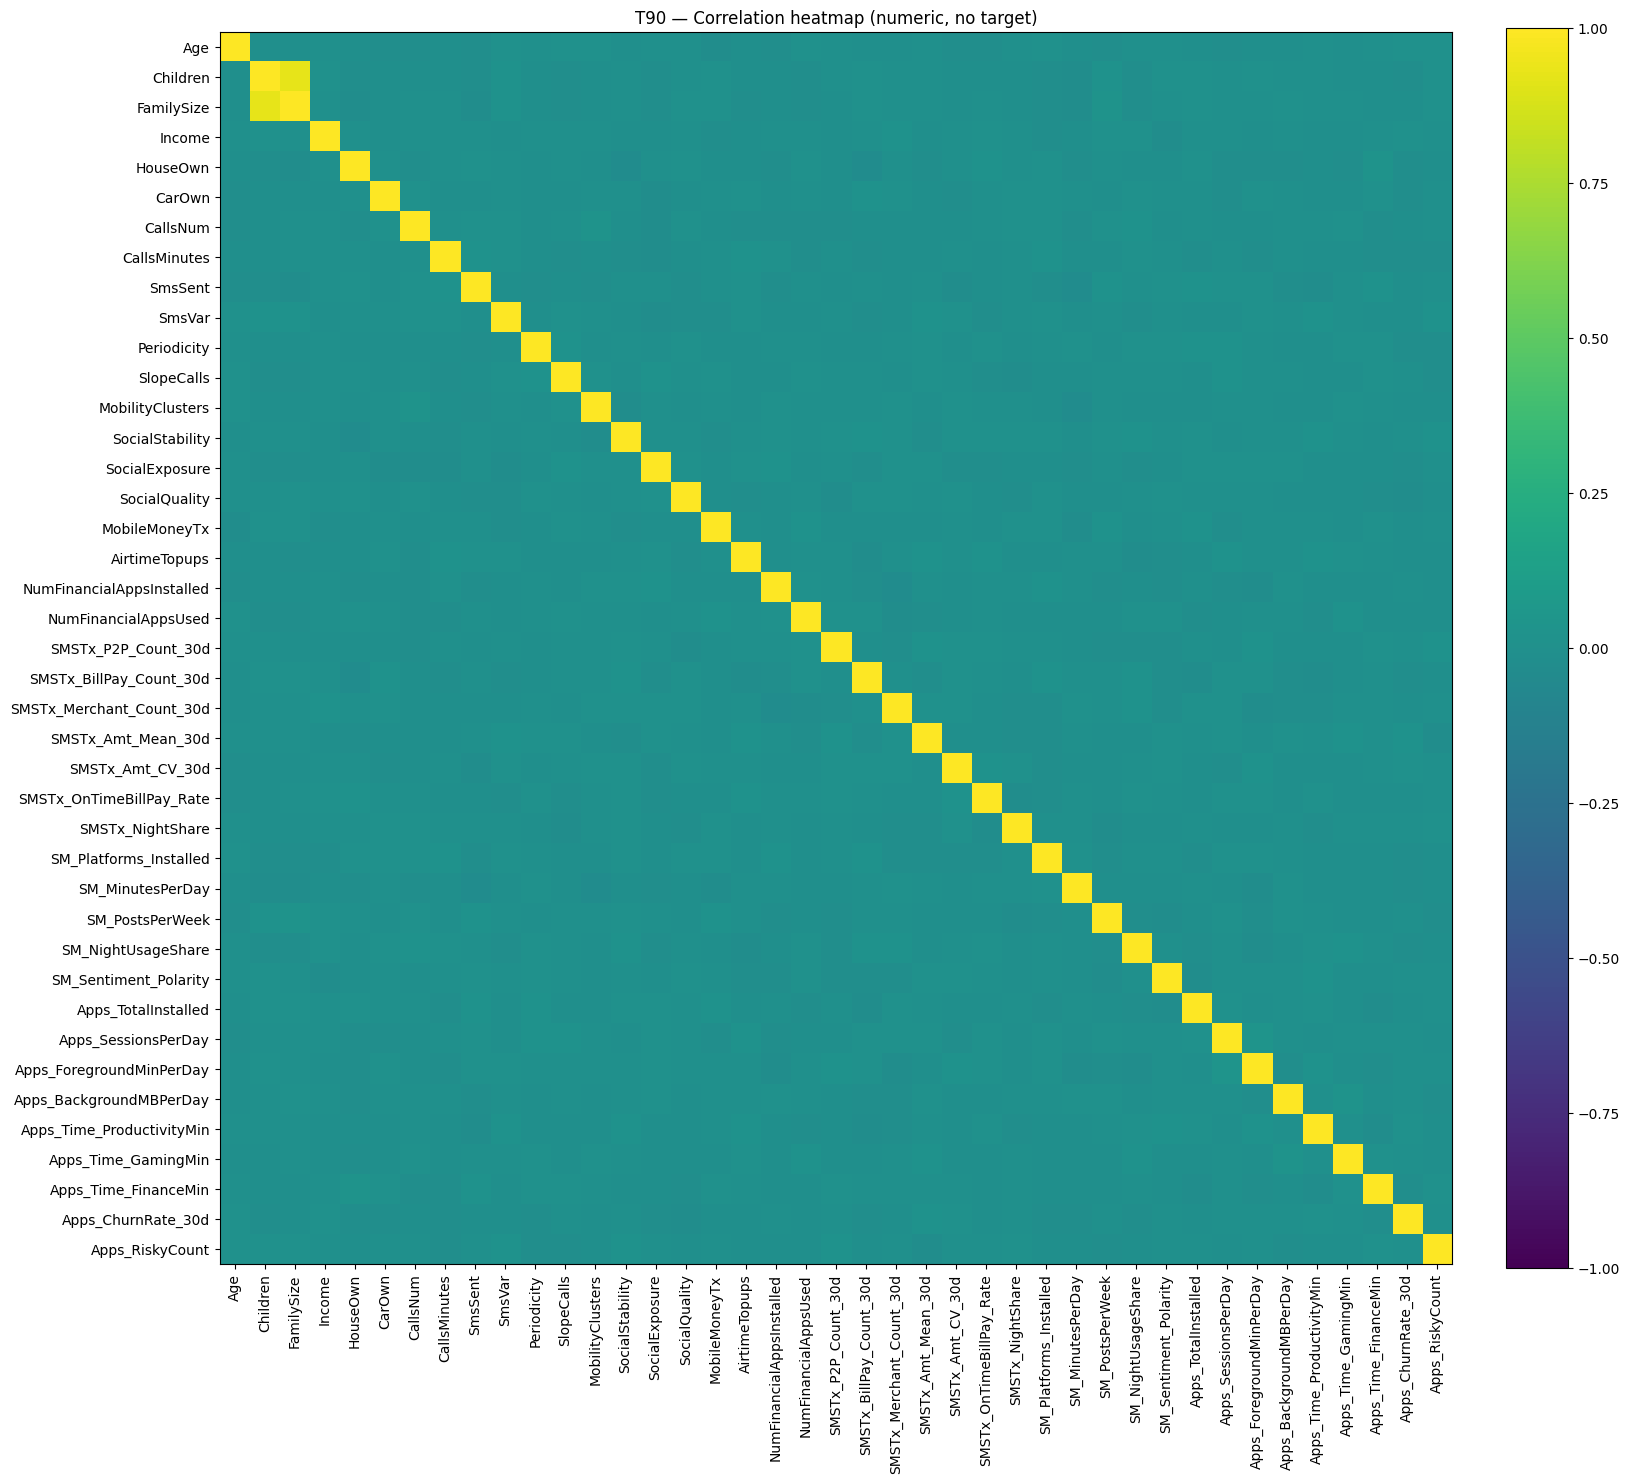

In [43]:
# Correlation heatmap
corr = df.drop(columns=["target",'Target(Creditworthy)', 'drivers_pos_count',
             'drivers_neg_count', 'drivers_pos_ratio', 'drivers_positive_features',
             'drivers_negative_features', 'adj_pos_ratio_T90', 'target_T90']).select_dtypes(include=[np.number]).corr()
# corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(max(8, 0.4*len(corr.columns)), max(6, 0.4*len(corr.columns))))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.title("T90 — Correlation heatmap (numeric, no target)")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout(); plt.show()

# Splitting the Data

In [44]:
y = df['target'].astype(int)#Selecting target variable

# Droping unwanted columns
drop_cols = ['target', 'Target(Creditworthy)', 'drivers_pos_count',
             'drivers_neg_count', 'drivers_pos_ratio', 'drivers_positive_features',
             'drivers_negative_features', 'adj_pos_ratio_T90', 'target_T90','FullName',
             'Email','Phone','Address','JobTitle','DateOfBirth','Age','Gender','Marriage',
             'Children','FamilySize','Education','Income','HouseOwn','CarOwn']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Spilliting Train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Model Implementation For T90

###MLP
Applying the MLP Preceptron Model on the dataset


In [45]:

#  Creating the Pipeline
pipeline_MLP_T90 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(132, 64, 32),activation="relu",solver="adam",alpha=3,max_iter=1000,early_stopping=True, verbose=True, random_state=42,))
])

# Train and evaluate
pipeline_MLP_T90.fit(X_train, y_train)
y_pred = pipeline_MLP_T90.predict(X_test)
y_proba = pipeline_MLP_T90.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Iteration 1, loss = 1.80243223
Validation score: 0.771250
Iteration 2, loss = 1.26708940
Validation score: 0.787500
Iteration 3, loss = 0.97812138
Validation score: 0.793750
Iteration 4, loss = 0.80183824
Validation score: 0.797500
Iteration 5, loss = 0.68972375
Validation score: 0.793750
Iteration 6, loss = 0.61604958
Validation score: 0.795000
Iteration 7, loss = 0.56775520
Validation score: 0.801250
Iteration 8, loss = 0.53574041
Validation score: 0.792500
Iteration 9, loss = 0.51443186
Validation score: 0.798750
Iteration 10, loss = 0.49842373
Validation score: 0.800000
Iteration 11, loss = 0.48760321
Validation score: 0.808750
Iteration 12, loss = 0.47870564
Validation score: 0.801250
Iteration 13, loss = 0.47177449
Validation score: 0.802500
Iteration 14, loss = 0.46854870
Validation score: 0.803750
Iteration 15, loss = 0.46378482
Validation score: 0.801250
Iteration 16, loss = 0.46164484
Validation score: 0.810000
Iteration 17, loss = 0.45966935
Validation score: 0.810000
Iterat

In [46]:
mlp_acc = accuracy_score(y_test, y_pred);
mlp_auc = roc_auc_score(y_test, y_proba);
mlp_p = y_proba;
mlp_y = y_test.reset_index(drop=True)


###KNN
Applying the KNN Model on the dataset


In [47]:
pipeline_KNN_T90 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=15))
])

pipeline_KNN_T90.fit(X_train, y_train)
y_pred = pipeline_KNN_T90.predict(X_test)
y_proba = pipeline_KNN_T90.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.7410
ROC-AUC: 0.8142

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1082
           1       0.74      0.68      0.71       918

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



In [48]:
knn_acc = accuracy_score(y_test, y_pred);
knn_auc = roc_auc_score(y_test, y_proba);
knn_p = y_proba;
knn_y = y_test.reset_index(drop=True)


###Logistic Regression
Applying the Logistic Regression Model on the dataset


In [49]:

pipeline_LR_T90 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

# Train and evaluate
pipeline_LR_T90.fit(X_train, y_train)
y_pred = pipeline_LR_T90.predict(X_test)
y_proba = pipeline_LR_T90.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Features: 35 | Test samples: 2000
Accuracy: 0.7930
ROC-AUC: 0.8857

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1082
           1       0.79      0.75      0.77       918

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



In [50]:
lr_acc = accuracy_score(y_test, y_pred);
lr_auc = roc_auc_score(y_test, y_proba);
lr_p = y_proba;
lr_y = y_test.reset_index(drop=True)


###Random Forest
Applying the Random Forest Classifier on the dataset




In [51]:

pipeline_RF_T90 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))
])

pipeline_RF_T90.fit(X_train, y_train)
y_pred = pipeline_RF_T90.predict(X_test)
y_proba = pipeline_RF_T90.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.8900
ROC-AUC: 0.9707

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1082
           1       0.94      0.82      0.87       918

    accuracy                           0.89      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [52]:
rf_acc = accuracy_score(y_test, y_pred);
rf_auc = roc_auc_score(y_test, y_proba);
rf_p = y_proba;
rf_y = y_test.reset_index(drop=True)


###Gradient Boost
Applying the GradientBoostingClassifier Model on the dataset


In [53]:

pipeline_GB_T90 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', GradientBoostingClassifier(random_state=42))
])

pipeline_GB_T90.fit(X_train, y_train)
y_pred = pipeline_GB_T90.predict(X_test)
y_proba = pipeline_GB_T90.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Features: 35 | Test samples: 2000
Accuracy: 0.9640
ROC-AUC: 0.9964

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1082
           1       0.97      0.95      0.96       918

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [54]:
gb_acc = accuracy_score(y_test, y_pred);
gb_auc = roc_auc_score(y_test, y_proba);
gb_p = y_proba;
gb_y = y_test.reset_index(drop=True)


###SVC
Applying the SVC Model on the dataset

In [55]:
pipeline_SVC_T90 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

pipeline_SVC_T90.fit(X_train, y_train)
y_pred = pipeline_SVC_T90.predict(X_test)
y_proba = pipeline_SVC_T90.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Features: 35 | Test samples: 2000
Accuracy: 0.8085
ROC-AUC: 0.8977

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1082
           1       0.79      0.79      0.79       918

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [56]:
svc_acc = accuracy_score(y_test, y_pred);
svc_auc = roc_auc_score(y_test, y_proba);
svc_p = y_proba;
svc_y = y_test.reset_index(drop=True)


# Comparing all the models


=== T90 model comparison ===
        Model  Accuracy  ROC_AUC
GradientBoost    0.9640 0.996420
 RandomForest    0.8900 0.970671
          MLP    0.8140 0.898374
          SVC    0.8085 0.897689
       LogReg    0.7930 0.885695
          KNN    0.7410 0.814216


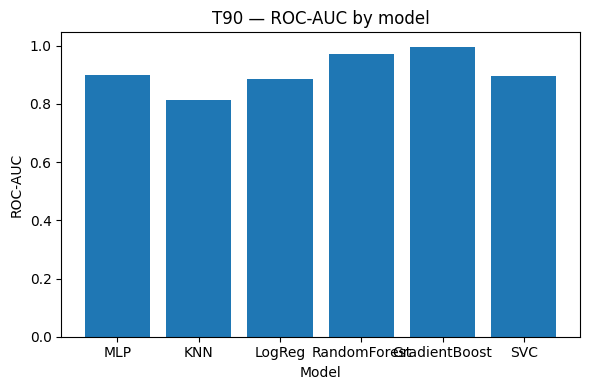

Best model: GradientBoost

Preview (Best predictions):
 y_true   p_good  score_300_900
      0 0.413565     477.045777
      0 0.221705     450.889279
      1 0.804575     527.955121
      1 0.698089     511.308620
      1 0.576490     496.020909
      1 0.962828     581.022498
      0 0.094157     421.800436
      0 0.368354     471.562401
      0 0.435712     479.661724
      0 0.324186     465.926757

=== SHAP Analysis for GradientBoost Model (T90) ===


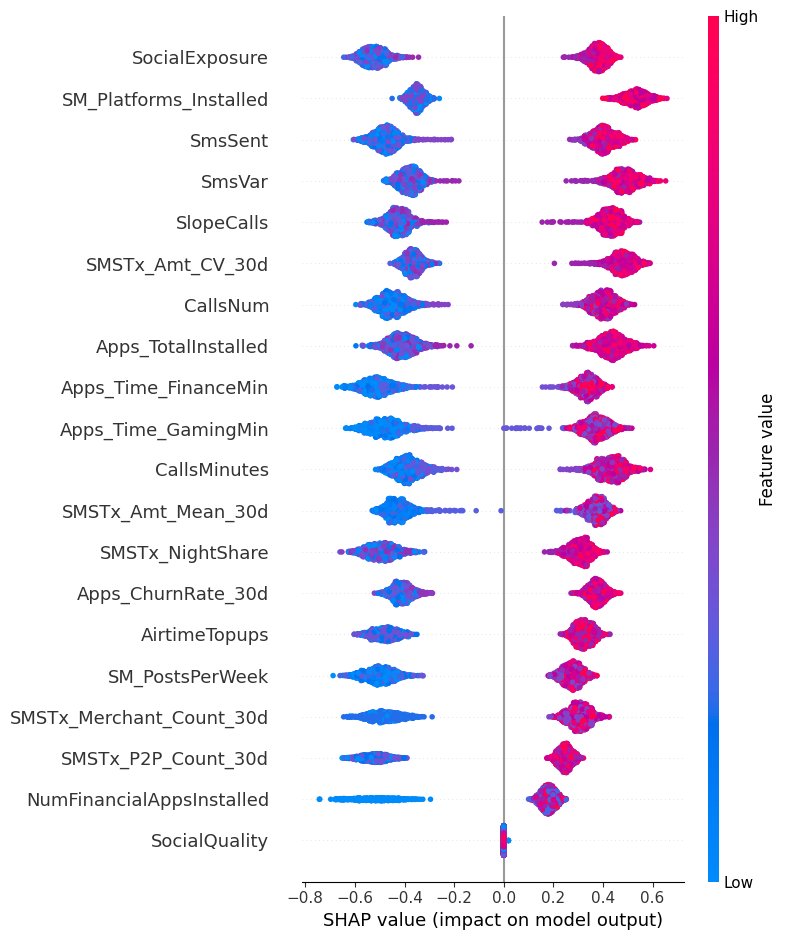


Most important feature (from SHAP): SocialExposure


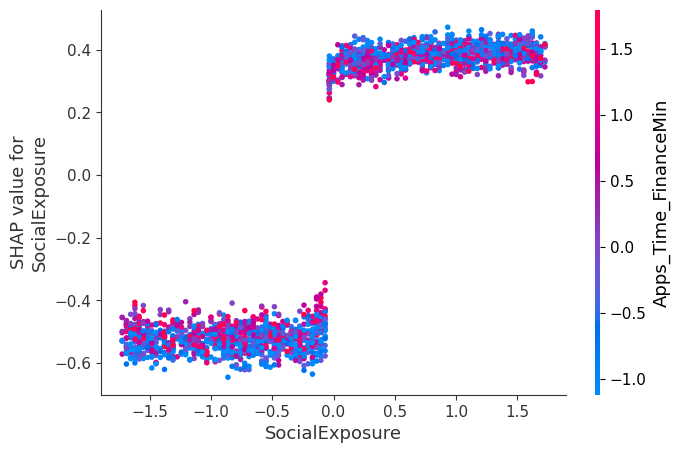


Most important feature: SocialExposure

Top 10 most important features:
SocialExposure            0.450623
SM_Platforms_Installed    0.443355
SmsSent                   0.438463
SmsVar                    0.432671
SlopeCalls                0.425154
SMSTx_Amt_CV_30d          0.424821
CallsNum                  0.423583
Apps_TotalInstalled       0.422429
Apps_Time_FinanceMin      0.421997
Apps_Time_GamingMin       0.417388
dtype: float64


In [57]:
import shap
# ComparING
comp = pd.DataFrame({
    "Model": ["MLP","KNN","LogReg","RandomForest","GradientBoost","SVC"],
    "Accuracy": [mlp_acc, knn_acc, lr_acc, rf_acc, gb_acc, svc_acc],
    "ROC_AUC": [mlp_auc, knn_auc, lr_auc, rf_auc, gb_auc, svc_auc]
})
print("\n=== T90 model comparison ===")
print(comp.sort_values("ROC_AUC", ascending=False).reset_index(drop=True).to_string(index=False))

# Bar chart (ROC-AUC)
plt.figure(figsize=(6,4))
plt.bar(comp["Model"], comp["ROC_AUC"])
plt.title("T90 — ROC-AUC by model")
plt.ylabel("ROC-AUC"); plt.xlabel("Model")
plt.tight_layout(); plt.show()

# Picking best model by ROC-AUC
best_idx  = comp["ROC_AUC"].idxmax()
best_name = comp.loc[best_idx, "Model"]
print("Best model:", best_name)

# Get the best pipeline based on the best model name
if best_name == "MLP":
    best_pipeline = pipeline_MLP_T90
    p_good, y_true = mlp_p, mlp_y
elif best_name == "KNN":
    best_pipeline = pipeline_KNN_T90
    p_good, y_true = knn_p, knn_y
elif best_name == "LogReg":
    best_pipeline = pipeline_LR_T90
    p_good, y_true = lr_p, lr_y
elif best_name == "RandomForest":
    best_pipeline = pipeline_RF_T90
    p_good, y_true = rf_p, rf_y
elif best_name == "GradientBoost":
    best_pipeline = pipeline_GB_T90
    p_good, y_true = gb_p, gb_y
else: # SVC
    best_pipeline = pipeline_SVC_T90
    p_good, y_true = svc_p, svc_y


p_good = np.clip(p_good, 1e-9, 1-1e-9)

#PDO mapping
PDO, BASE_SCORE, BASE_ODDS = 20, 600, 50
factor = PDO / np.log(2.0)
offset = BASE_SCORE - factor * np.log(BASE_ODDS)
odds   = p_good / (1 - p_good)
score  = np.clip(offset + factor * np.log(odds), 300, 900)

preds = pd.DataFrame({"y_true": y_true, "p_good": p_good, "score_300_900": score})
print("\nPreview (Best predictions):")
print(preds.head(10).to_string(index=False))

# SHAP analysis for the best model
print(f"\n=== SHAP Analysis for {best_name} Model (T90) ===")
# Create a SHAP explainer
# Use the trained pipeline to transform the data before passing to SHAP
explainer = shap.Explainer(best_pipeline.named_steps['clf'], best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_train)))

# Calculate SHAP values
shap_values = explainer(best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)))

# Generate SHAP summary plot
shap.summary_plot(shap_values, best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)), feature_names=X_test.columns)

# Generate SHAP dependence plot for the most important feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.Series(mean_abs_shap_values, index=X_test.columns)
most_important_feature = feature_importance.idxmax()
print(f"\nMost important feature (from SHAP): {most_important_feature}")
shap.dependence_plot(most_important_feature, shap_values.values, best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)), feature_names=X_test.columns)
# See which feature is most important
print(f"\nMost important feature: {most_important_feature}")

# See feature importance ranking
print("\nTop 10 most important features:")
print(feature_importance.sort_values(ascending=False).head(10))

#Load the data from dataset_T80.csv
Loading the data from the CSV file into a pandas DataFrame.
## Inspect the data
Display the first few rows of the DataFrame, checking data types, and looking for missing values.
## Summarize the data
Generate statistics for numerical and categorical columns.

In [58]:
df_T80 = pd.read_csv('dataset_T80.csv')
display(df_T80.head())
df_T80.info()
display(df_T80.isnull().sum())
display(df_T80.describe())
display(df_T80.describe(include='object'))

,FullName,Email,Phone,Address,JobTitle,DateOfBirth,Age,Gender,Marriage,Children,...,Apps_RiskyCount,Target(Creditworthy),drivers_pos_count,drivers_neg_count,drivers_pos_ratio,drivers_positive_features,drivers_negative_features,adj_pos_ratio_T80,target_T80,target
0,Karen Thompson,wmorse@hotmail.com,+1-718-333-1390x128,"1013 Garcia Causeway Apt. 881, Port Jaime, VT ...",Theatre director,2006-07-23,18,Female,Married,1,...,4,0,14,6,0.70,"CallsMinutes,Apps_Time_GamingMin,SmsSent,Calls...","SMSTx_Amt_Mean_30d,Apps_TotalInstalled,SM_Post...",0.56,1,1
1,Jeremy Case,charles24@hotmail.com,+1-720-559-8988x9286,"1969 Katherine Walk Apt. 538, Eugeneview, MA 3...",Information systems manager,1989-01-05,35,Male,Single,3,...,4,0,8,12,0.40,"Apps_Time_GamingMin,SmsSent,Apps_Time_FinanceM...","CallsMinutes,SMSTx_Amt_Mean_30d,CallsNum,Apps_...",0.32,0,0
2,Laura Mcdaniel,erin25@hotmail.com,(539)272-1823x6598,"8019 Gonzalez Divide, Port Erin, VA 41799",Manufacturing engineer,1995-01-05,29,Male,Single,3,...,0,0,11,9,0.55,"Apps_Time_GamingMin,SmsSent,SM_PostsPerWeek,SM...","CallsMinutes,SMSTx_Amt_Mean_30d,CallsNum,Apps_...",0.44,0,0
3,John Green,hollysims@gmail.com,(690)509-1995x434,"699 Rivera Crest Apt. 924, West Jesseberg, NM ...",Audiological scientist,2003-08-16,21,Male,Single,2,...,4,1,13,7,0.65,"CallsMinutes,SmsSent,Apps_Time_FinanceMin,SM_P...","Apps_Time_GamingMin,SMSTx_Amt_Mean_30d,CallsNu...",0.52,1,1
4,Jeffrey Hampton,fwilliams@yahoo.com,786-778-5141,"0897 Heather Squares, Port Donnafurt, MO 46349","Scientist, physiological",2006-01-19,18,Male,Single,2,...,1,1,11,9,0.55,"Apps_Time_GamingMin,SMSTx_Amt_Mean_30d,Apps_To...","CallsMinutes,SmsSent,CallsNum,Apps_Time_Financ...",0.44,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FullName                   10000 non-null  object 
 1   Email                      10000 non-null  object 
 2   Phone                      10000 non-null  object 
 3   Address                    10000 non-null  object 
 4   JobTitle                   10000 non-null  object 
 5   DateOfBirth                10000 non-null  object 
 6   Age                        10000 non-null  int64  
 7   Gender                     10000 non-null  object 
 8   Marriage                   10000 non-null  object 
 9   Children                   10000 non-null  int64  
 10  FamilySize                 10000 non-null  int64  
 11  Education                  10000 non-null  object 
 12  Income                     10000 non-null  int64  
 13  HouseOwn                   10000 non-null  int6

,0
FullName,0
Email,0
Phone,0
Address,0
JobTitle,0
DateOfBirth,0
Age,0
Gender,0
Marriage,0
Children,0


,Age,Children,FamilySize,Income,HouseOwn,CarOwn,CallsNum,CallsMinutes,SmsSent,SmsVar,...,Apps_Time_FinanceMin,Apps_ChurnRate_30d,Apps_RiskyCount,Target(Creditworthy),drivers_pos_count,drivers_neg_count,drivers_pos_ratio,adj_pos_ratio_T80,target_T80,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.489600,1.469900,2.972700,3349.512800,0.390700,0.307600,34.688300,48.234800,34.212600,0.001684,...,22.859000,0.152955,1.7840,0.500000,11.259600,8.740400,0.562980,0.450384,0.281900,0.281900
std,11.177996,1.217556,1.318609,1784.597762,0.487932,0.461523,21.778218,32.505306,21.880038,1.001769,...,20.511528,0.094334,1.6671,0.500025,2.152411,2.152411,0.107621,0.086096,0.449947,0.449947
min,18.000000,0.000000,1.000000,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.770000,...,0.000000,0.000000,0.0000,0.000000,3.000000,1.000000,0.150000,0.120000,0.000000,0.000000
25%,27.000000,1.000000,2.000000,2101.000000,0.000000,0.000000,17.000000,22.000000,17.000000,-0.670000,...,3.000000,0.080000,0.0000,0.000000,10.000000,7.000000,0.500000,0.400000,0.000000,0.000000
50%,35.000000,1.000000,3.000000,2977.000000,0.000000,0.000000,33.000000,44.000000,32.000000,-0.000000,...,20.000000,0.150000,2.0000,0.500000,11.000000,9.000000,0.550000,0.440000,0.000000,0.000000
75%,43.000000,2.000000,4.000000,4139.000000,1.000000,1.000000,50.000000,69.000000,49.000000,0.680000,...,37.000000,0.220000,3.0000,1.000000,13.000000,10.000000,0.650000,0.520000,1.000000,1.000000
max,70.000000,8.000000,10.000000,23801.000000,1.000000,1.000000,123.000000,180.000000,132.000000,3.990000,...,119.000000,0.500000,9.0000,1.000000,19.000000,17.000000,0.950000,0.760000,1.000000,1.000000


,FullName,Email,Phone,Address,JobTitle,DateOfBirth,Gender,Marriage,Education,drivers_positive_features,drivers_negative_features
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9374,9783,10000,10000,639,6989,2,3,3,9841,9841
top,Michael Smith,bsmith@gmail.com,426.478.6809x5995,"Unit 2579 Box 4179, DPO AP 17478",Research scientist (maths),2006-11-14,Male,Single,Secondary,"SMSTx_Amt_Mean_30d,SmsSent,CallsNum,Apps_Time_...","CallsMinutes,Apps_Time_GamingMin,SM_Platforms_..."
freq,8,4,1,1,26,8,6183,5027,4945,3,3


## Expolratory Data Analysis
Perform exploratory data analysis (EDA) on the dataset.

### EDA for calls related features

Rows: 10000 | target share: 0.2819


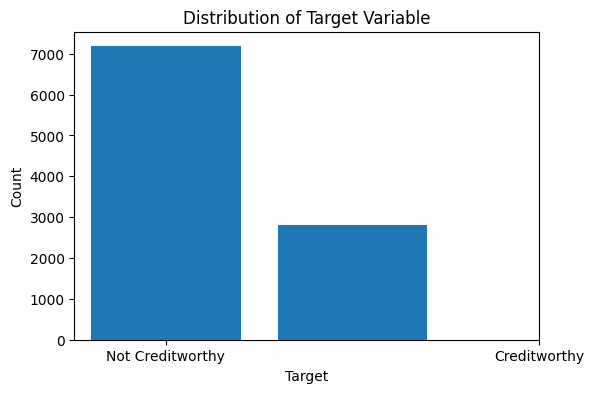

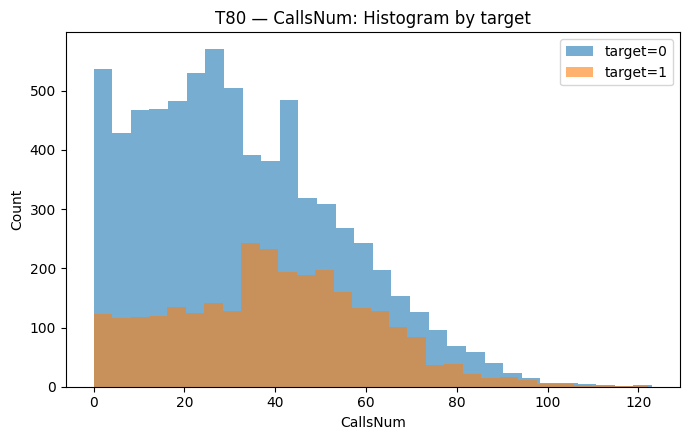

/tmp/ipython-input-1654784043.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


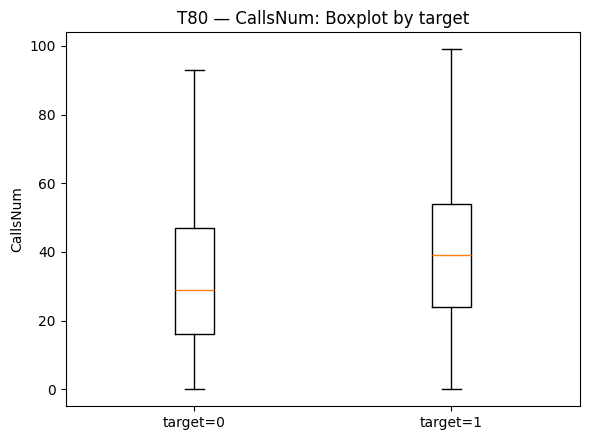

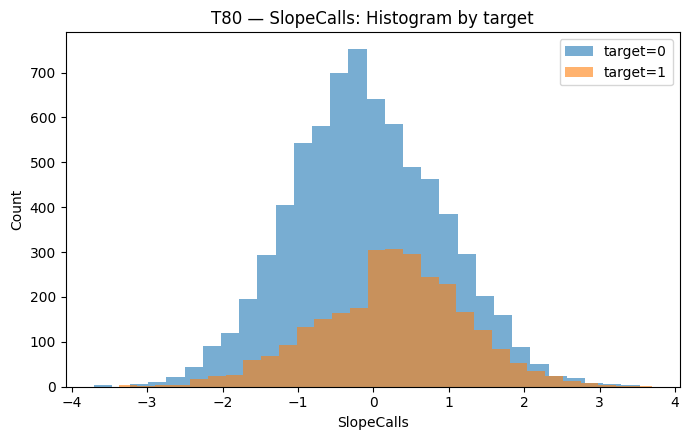

/tmp/ipython-input-1654784043.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


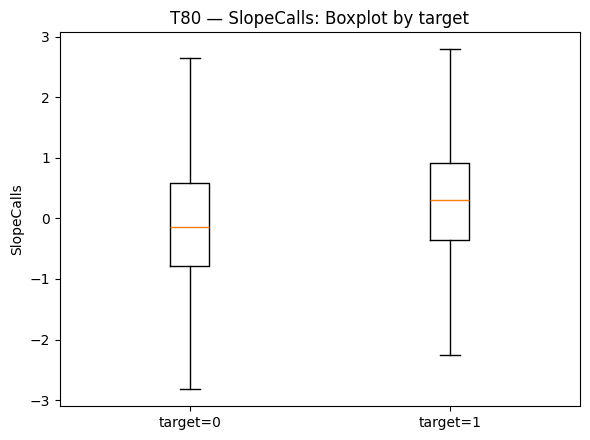

In [59]:
print("Rows:", len(df_T80), "| target share:", round(float(df_T80["target"].mean()), 4))
plt.figure(figsize=(6, 4))
plt.hist(df_T80['target'], bins=2, align='left', rwidth=0.8)
plt.xticks([0, 1], ['Not Creditworthy', 'Creditworthy'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

calls = ["CallsNum", "SlopeCalls"]
for feature in calls:
    x0 = df_T80.loc[df_T80["target"]==0, feature].dropna()
    x1 = df_T80.loc[df_T80["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T80 — {feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T80 — {feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()




### EDA for transaction related features

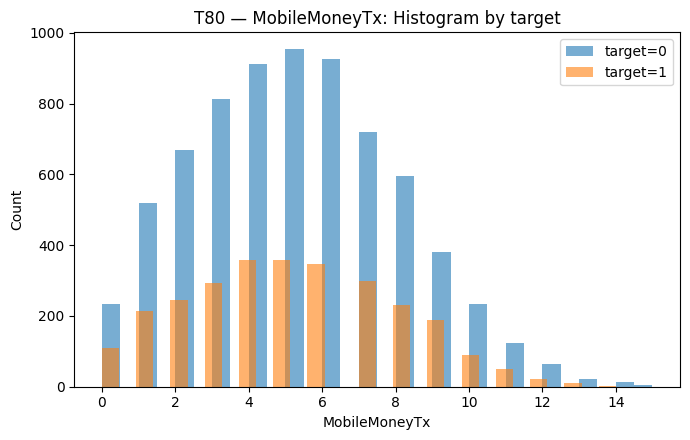

/tmp/ipython-input-3266579919.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


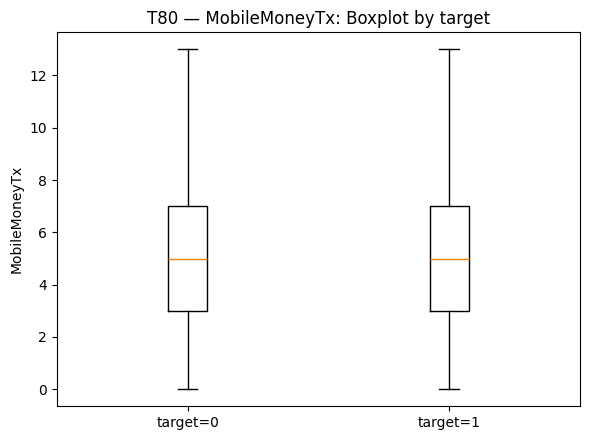

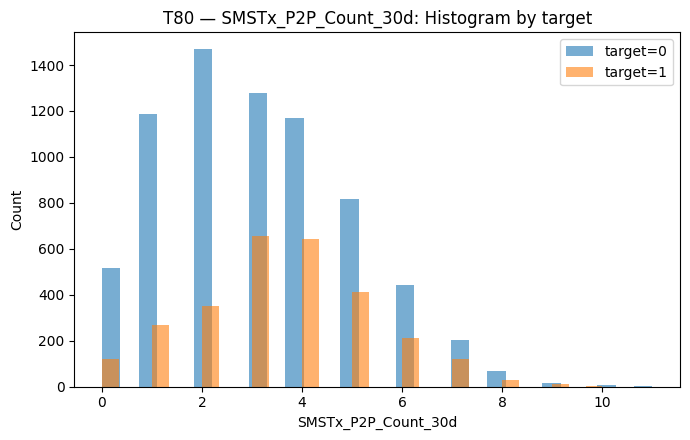

/tmp/ipython-input-3266579919.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


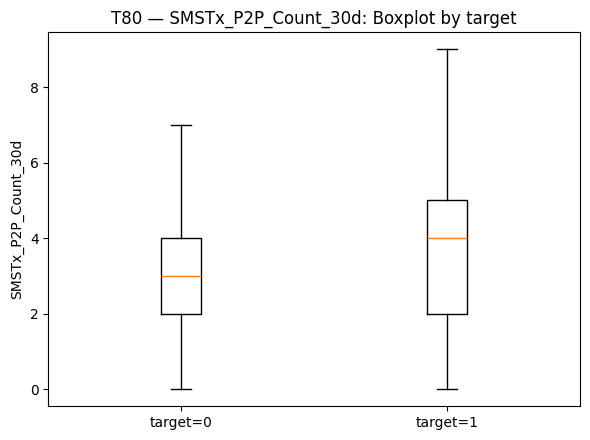

In [60]:
tx = ["MobileMoneyTx", "SMSTx_P2P_Count_30d"]
for feature in tx:
    x0 = df_T80.loc[df_T80["target"]==0, feature].dropna()
    x1 = df_T80.loc[df_T80["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T80 — {feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T80 — {feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### EDA for social behaviour related features

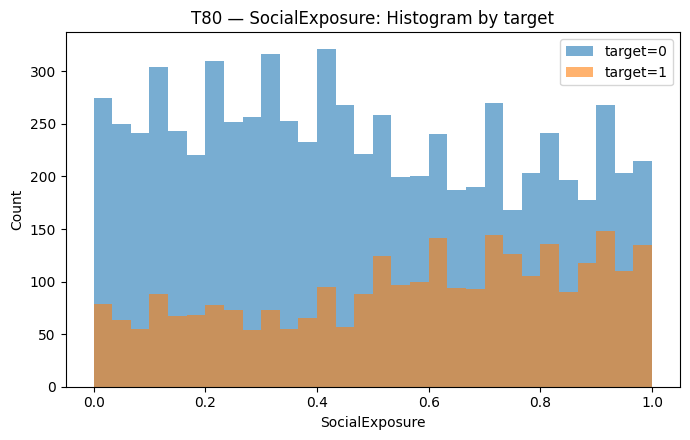

/tmp/ipython-input-2515754143.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


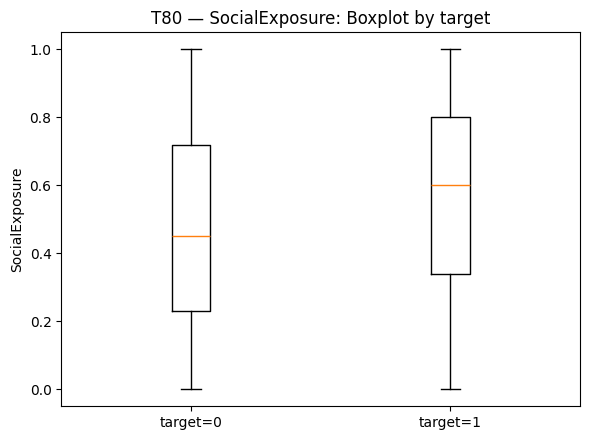

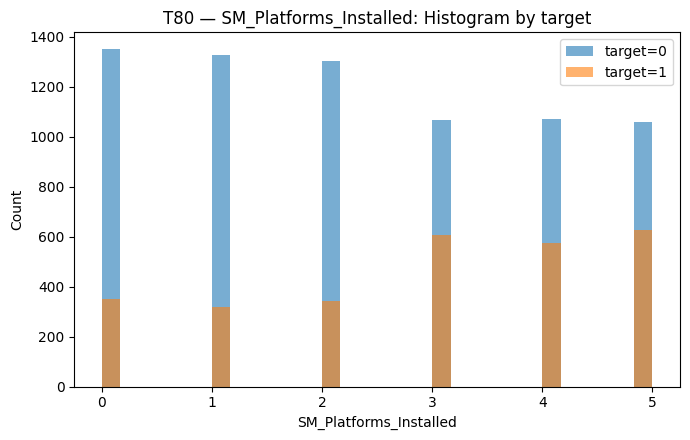

/tmp/ipython-input-2515754143.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


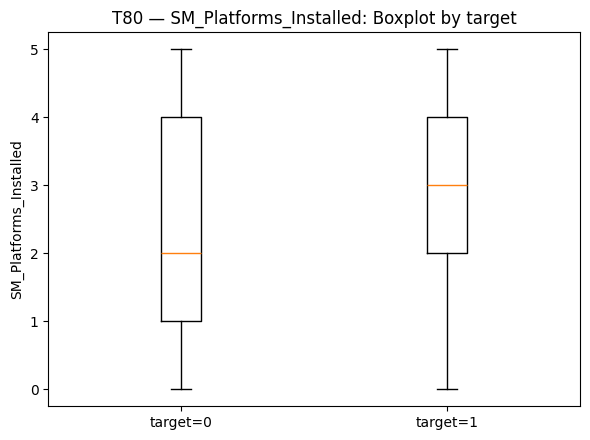

In [61]:
social = ["SocialExposure", "SM_Platforms_Installed"]
for feature in social:
    x0 = df_T80.loc[df_T80["target"]==0, feature].dropna()
    x1 = df_T80.loc[df_T80["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T80 — {feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T80 — {feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### HeatMap

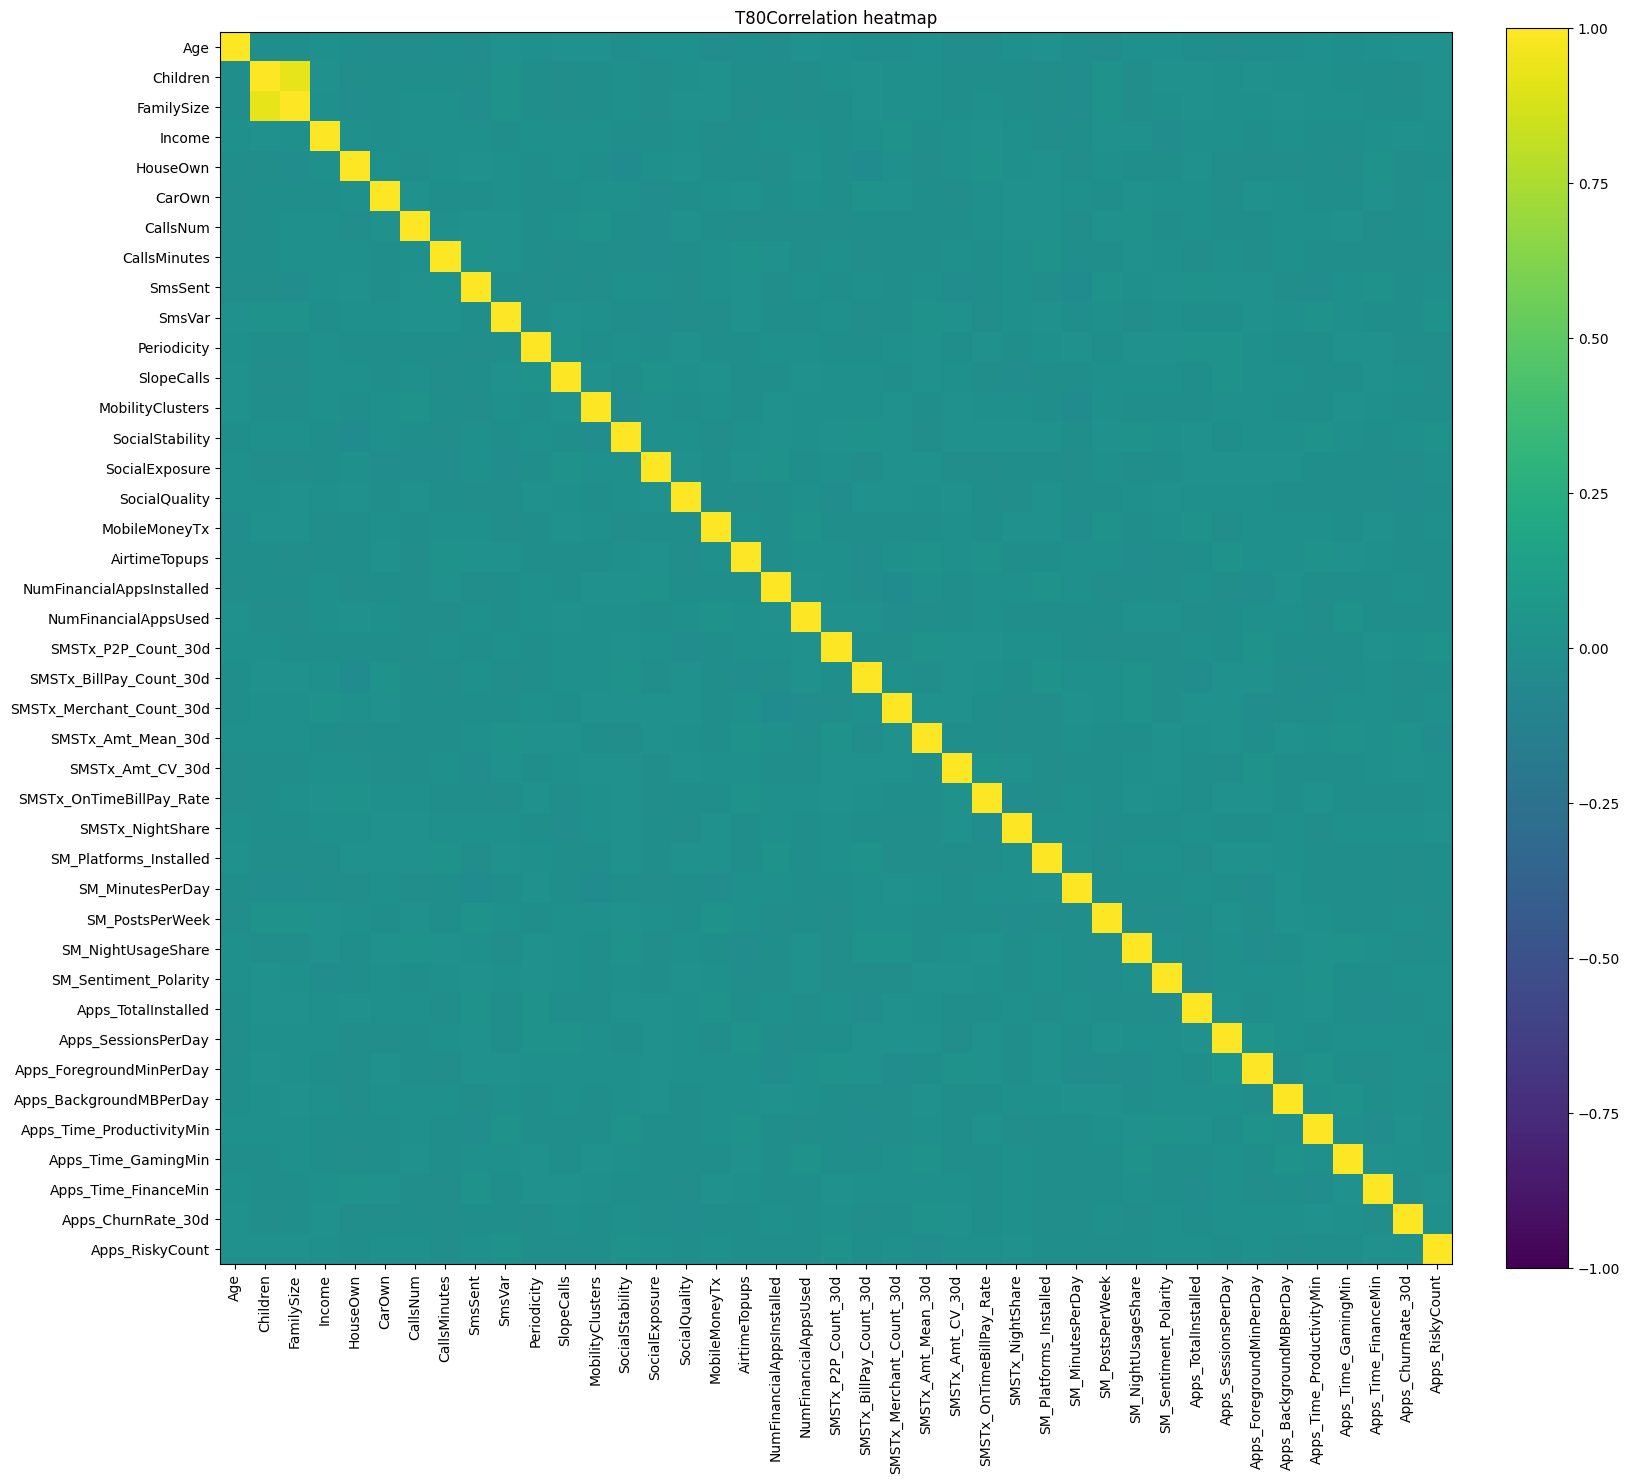

In [62]:
# Correlation heatmap
corr = df_T80.drop(columns=["target",'Target(Creditworthy)', 'drivers_pos_count',
             'drivers_neg_count', 'drivers_pos_ratio', 'drivers_positive_features',
             'drivers_negative_features', 'adj_pos_ratio_T80', 'target_T80']).select_dtypes(include=[np.number]).corr()
# corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(max(8, 0.4*len(corr.columns)), max(6, 0.4*len(corr.columns))))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.title("T80Correlation heatmap")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout(); plt.show()

# Spilitting the data

In [63]:
y = df_T80['target'].astype(int)

# Drop unwanted columns
drop_cols = ['target', 'Target(Creditworthy)', 'drivers_pos_count',
             'drivers_neg_count', 'drivers_pos_ratio', 'drivers_positive_features',
             'drivers_negative_features', 'adj_pos_ratio_T80', 'target_T80','FullName',
             'Email','Phone','Address','JobTitle','DateOfBirth','Age','Gender','Marriage',
             'Children','FamilySize','Education','Income','HouseOwn','CarOwn']
X = df_T80.drop(columns=[col for col in drop_cols if col in df_T80.columns])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Model Implementation For T80

### MLP

In [64]:
# Pipeline
pipeline_MLP_T80 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(132, 64, 32),activation="relu",solver="adam",alpha=3,max_iter=1000,early_stopping=True, verbose=True, random_state=42,))
])

# Train and evaluate
pipeline_MLP_T80.fit(X_train, y_train)
y_pred = pipeline_MLP_T80.predict(X_test)
y_proba = pipeline_MLP_T80.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Iteration 1, loss = 1.79482929
Validation score: 0.745000
Iteration 2, loss = 1.26701587
Validation score: 0.817500
Iteration 3, loss = 0.95223244
Validation score: 0.827500
Iteration 4, loss = 0.76214944
Validation score: 0.828750
Iteration 5, loss = 0.64131540
Validation score: 0.831250
Iteration 6, loss = 0.56278321
Validation score: 0.827500
Iteration 7, loss = 0.51162976
Validation score: 0.833750
Iteration 8, loss = 0.47769466
Validation score: 0.831250
Iteration 9, loss = 0.45480427
Validation score: 0.833750
Iteration 10, loss = 0.43931739
Validation score: 0.826250
Iteration 11, loss = 0.42737023
Validation score: 0.836250
Iteration 12, loss = 0.42216312
Validation score: 0.830000
Iteration 13, loss = 0.41231150
Validation score: 0.828750
Iteration 14, loss = 0.40812888
Validation score: 0.833750
Iteration 15, loss = 0.40272663
Validation score: 0.836250
Iteration 16, loss = 0.39964186
Validation score: 0.840000
Iteration 17, loss = 0.39744394
Validation score: 0.833750
Iterat

In [65]:
mlp_acc = accuracy_score(y_test, y_pred);
mlp_auc = roc_auc_score(y_test, y_proba);
mlp_p = y_proba;
mlp_y = y_test.reset_index(drop=True)

###KNN

In [66]:
pipeline_KNN_T80 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=15))
])

pipeline_KNN_T80.fit(X_train, y_train)
y_pred = pipeline_KNN_T80.predict(X_test)
y_proba = pipeline_KNN_T80.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.7890
ROC-AUC: 0.8238

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1436
           1       0.76      0.37      0.49       564

    accuracy                           0.79      2000
   macro avg       0.78      0.66      0.68      2000
weighted avg       0.78      0.79      0.76      2000



In [67]:
knn_acc = accuracy_score(y_test, y_pred);
knn_auc = roc_auc_score(y_test, y_proba);
knn_p = y_proba;
knn_y = y_test.reset_index(drop=True)

### Logistic Regression

In [68]:
pipeline_LR_T80 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

# Train and evaluate
pipeline_LR_T80.fit(X_train, y_train)
y_pred = pipeline_LR_T80.predict(X_test)
y_proba = pipeline_LR_T80.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Features: 35 | Test samples: 2000
Accuracy: 0.8175
ROC-AUC: 0.8917

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1436
           1       0.69      0.63      0.66       564

    accuracy                           0.82      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.81      0.82      0.81      2000



In [69]:
lr_acc = accuracy_score(y_test, y_pred);
lr_auc = roc_auc_score(y_test, y_proba);
lr_p = y_proba;
lr_y = y_test.reset_index(drop=True)


### Random Forest



In [70]:
pipeline_RF_T80 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))
])

pipeline_RF_T80.fit(X_train, y_train)
y_pred = pipeline_RF_T80.predict(X_test)
y_proba = pipeline_RF_T80.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.8305
ROC-AUC: 0.9674

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1436
           1       0.99      0.40      0.57       564

    accuracy                           0.83      2000
   macro avg       0.90      0.70      0.73      2000
weighted avg       0.86      0.83      0.80      2000



In [71]:
rf_acc = accuracy_score(y_test, y_pred);
rf_auc = roc_auc_score(y_test, y_proba);
rf_p = y_proba;
rf_y = y_test.reset_index(drop=True)

###Gradient Boost

In [72]:
pipeline_GB_T80 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', GradientBoostingClassifier(random_state=42))
])

pipeline_GB_T80.fit(X_train, y_train)
y_pred = pipeline_GB_T80.predict(X_test)
y_proba = pipeline_GB_T80.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Features: 35 | Test samples: 2000
Accuracy: 0.9280
ROC-AUC: 0.9946

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1436
           1       1.00      0.75      0.85       564

    accuracy                           0.93      2000
   macro avg       0.95      0.87      0.90      2000
weighted avg       0.93      0.93      0.92      2000



In [73]:
gb_acc = accuracy_score(y_test, y_pred);
gb_auc = roc_auc_score(y_test, y_proba);
gb_p = y_proba;
gb_y = y_test.reset_index(drop=True)


###SVC

In [74]:
pipeline_SVC_T80 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

pipeline_SVC_T80.fit(X_train, y_train)
y_pred = pipeline_SVC_T80.predict(X_test)
y_proba = pipeline_SVC_T80.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Features: 35 | Test samples: 2000
Accuracy: 0.8490
ROC-AUC: 0.9054

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1436
           1       0.76      0.68      0.72       564

    accuracy                           0.85      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.85      0.85      0.85      2000



In [75]:
svc_acc = accuracy_score(y_test, y_pred);
svc_auc = roc_auc_score(y_test, y_proba);
svc_p = y_proba;
svc_y = y_test.reset_index(drop=True)

# Comparing all the models


=== T80 model comparison ===
        Model  Accuracy  ROC_AUC
GradientBoost    0.9380 0.973171
 RandomForest    0.9525 0.945762
          SVC    0.9300 0.915434
          MLP    0.9170 0.911491
       LogReg    0.8270 0.903343
          KNN    0.3410 0.802686


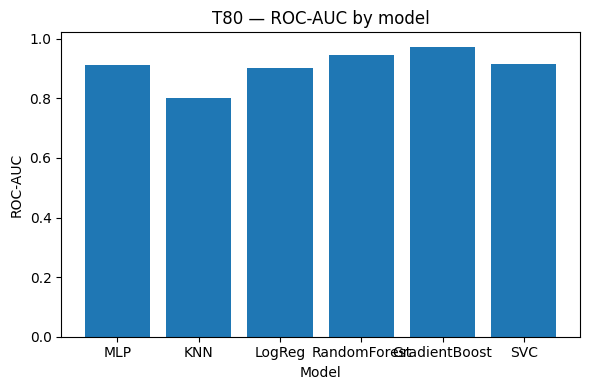

Best model: GradientBoost

Preview (winner predictions):
 y_true   p_good  score_300_900
      0 0.038045     393.919063
      0 0.341588     468.188267
      0 0.042443     397.207968
      0 0.054894     405.007941
      0 0.058478     406.942245
      0 0.102249     424.438455
      0 0.122933     430.426559
      0 0.018507     372.546117
      0 0.239398     453.768283
      0 0.278971     459.724105

=== SHAP Analysis for GradientBoost Model (T80) ===


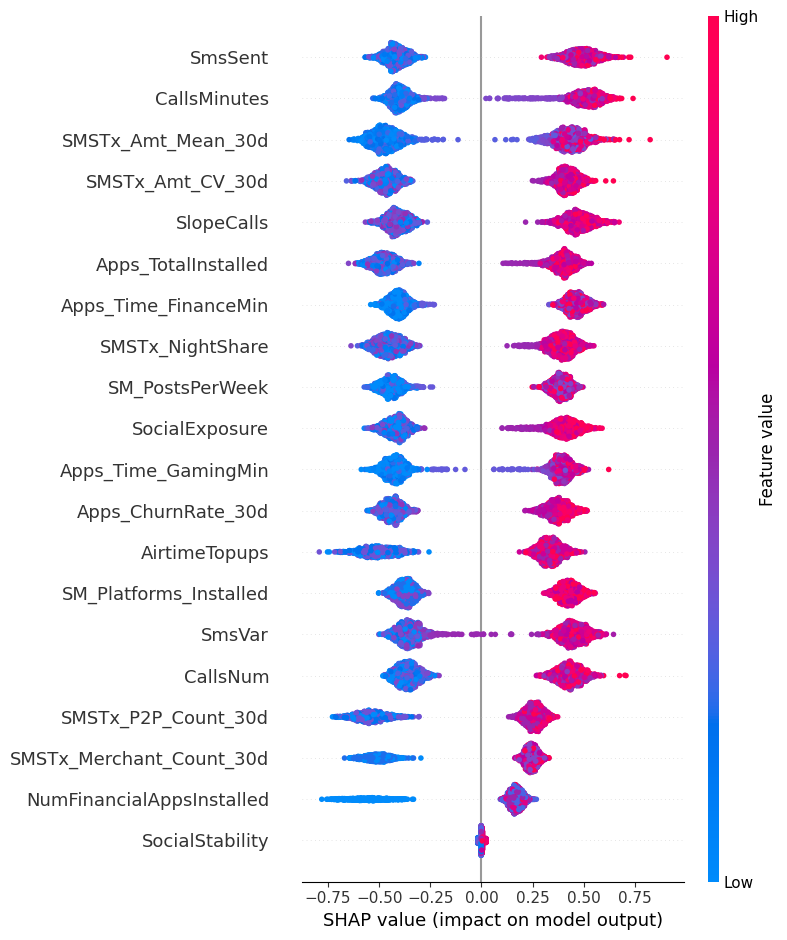


Most important feature (from SHAP): SmsSent


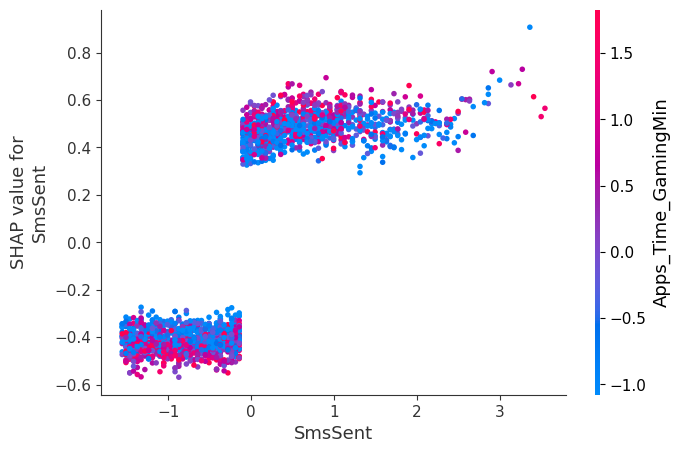


Top 10 most important features:
SmsSent                 0.453160
CallsMinutes            0.447299
SMSTx_Amt_Mean_30d      0.445173
SMSTx_Amt_CV_30d        0.443010
SlopeCalls              0.441586
Apps_TotalInstalled     0.433816
Apps_Time_FinanceMin    0.433792
SMSTx_NightShare        0.419384
SM_PostsPerWeek         0.412431
SocialExposure          0.407634
dtype: float64


In [96]:
import shap
# ComparING
comp = pd.DataFrame({
    "Model": ["MLP","KNN","LogReg","RandomForest","GradientBoost","SVC"],
    "Accuracy": [mlp_acc, knn_acc, lr_acc, rf_acc, gb_acc, svc_acc],
    "ROC_AUC": [mlp_auc, knn_auc, lr_auc, rf_auc, gb_auc, svc_auc]
})
print("\n=== T80 model comparison ===")
print(comp.sort_values("ROC_AUC", ascending=False).reset_index(drop=True).to_string(index=False))

# Bar chart (ROC-AUC)
plt.figure(figsize=(6,4))
plt.bar(comp["Model"], comp["ROC_AUC"])
plt.title("T80 — ROC-AUC by model")
plt.ylabel("ROC-AUC"); plt.xlabel("Model")
plt.tight_layout(); plt.show()

# Pick best model by ROC-AUC
best_idx  = comp["ROC_AUC"].idxmax()
best_name = comp.loc[best_idx, "Model"]
print("Best model:", best_name)

# Using its probabilities to output probability & 300–900 credit score
if best_name=="MLP":
    best_pipeline = pipeline_MLP_T80
    p_good, y_true = mlp_p, mlp_y
elif best_name=="KNN":
    best_pipeline = pipeline_KNN_T80
    p_good, y_true = knn_p, knn_y
elif best_name=="LogReg":
    best_pipeline = pipeline_LR_T80
    p_good, y_true = lr_p, lr_y
elif best_name=="RandomForest":
    best_pipeline = pipeline_RF_T80
    p_good, y_true = rf_p, rf_y
elif best_name=="GradientBoost":
    best_pipeline = pipeline_GB_T80
    p_good, y_true = gb_p, gb_y
else:
    best_pipeline = pipeline_SVC_T80
    p_good, y_true = svc_p, svc_y

p_good = np.clip(p_good, 1e-9, 1-1e-9)

# PDO mapping
PDO, BASE_SCORE, BASE_ODDS = 20, 600, 50
factor = PDO / np.log(2.0)
offset = BASE_SCORE - factor * np.log(BASE_ODDS)
odds   = p_good / (1 - p_good)
score  = np.clip(offset + factor * np.log(odds), 300, 900)

preds = pd.DataFrame({"y_true": y_true, "p_good": p_good, "score_300_900": score})
print("\nPreview (winner predictions):")
print(preds.head(10).to_string(index=False))

# SHAP analysis for the best model
print(f"\n=== SHAP Analysis for {best_name} Model (T80) ===")
# Create a SHAP explainer
# Use the trained pipeline to transform the data before passing to SHAP
explainer = shap.Explainer(best_pipeline.named_steps['clf'], best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_train)))

# Calculate SHAP values
shap_values = explainer(best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)))

# Generate SHAP summary plot
shap.summary_plot(shap_values, best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)), feature_names=X_test.columns)

# Generate SHAP dependence plot for the most important feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.Series(mean_abs_shap_values, index=X_test.columns)
most_important_feature = feature_importance.idxmax()
print(f"\nMost important feature (from SHAP): {most_important_feature}")
shap.dependence_plot(most_important_feature, shap_values.values, best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)), feature_names=X_test.columns)
# See feature importance ranking
print("\nTop 10 most important features:")
print(feature_importance.sort_values(ascending=False).head(10))

#Load the data from dataset_T70.csv
Loading the data from the CSV file into a pandas DataFrame.
## Inspect the data
Display the first few rows of the DataFrame, checking data types, and looking for missing values.
## Summarize the data
Generate statistics for numerical and categorical columns.

In [77]:
df_T70 = pd.read_csv('dataset_T70.csv')
display(df_T70.head())
df_T70.info()
display(df_T70.isnull().sum())
display(df_T70.describe())
display(df_T70.describe(include='object'))

,FullName,Email,Phone,Address,JobTitle,DateOfBirth,Age,Gender,Marriage,Children,...,Apps_RiskyCount,Target(Creditworthy),drivers_pos_count,drivers_neg_count,drivers_pos_ratio,drivers_positive_features,drivers_negative_features,adj_pos_ratio_T70,target_T70,target
0,Karen Thompson,wmorse@hotmail.com,+1-718-333-1390x128,"1013 Garcia Causeway Apt. 881, Port Jaime, VT ...",Theatre director,2006-07-23,18,Female,Married,1,...,4,0,14,6,0.70,"CallsMinutes,Apps_Time_GamingMin,SmsSent,Calls...","SMSTx_Amt_Mean_30d,Apps_TotalInstalled,SM_Post...",0.490,0,0
1,Jeremy Case,charles24@hotmail.com,+1-720-559-8988x9286,"1969 Katherine Walk Apt. 538, Eugeneview, MA 3...",Information systems manager,1989-01-05,35,Male,Single,3,...,4,0,8,12,0.40,"Apps_Time_GamingMin,SmsSent,Apps_Time_FinanceM...","CallsMinutes,SMSTx_Amt_Mean_30d,CallsNum,Apps_...",0.280,0,0
2,Laura Mcdaniel,erin25@hotmail.com,(539)272-1823x6598,"8019 Gonzalez Divide, Port Erin, VA 41799",Manufacturing engineer,1995-01-05,29,Male,Single,3,...,0,0,11,9,0.55,"Apps_Time_GamingMin,SmsSent,SM_PostsPerWeek,SM...","CallsMinutes,SMSTx_Amt_Mean_30d,CallsNum,Apps_...",0.385,0,0
3,John Green,hollysims@gmail.com,(690)509-1995x434,"699 Rivera Crest Apt. 924, West Jesseberg, NM ...",Audiological scientist,2003-08-16,21,Male,Single,2,...,4,1,13,7,0.65,"CallsMinutes,SmsSent,Apps_Time_FinanceMin,SM_P...","Apps_Time_GamingMin,SMSTx_Amt_Mean_30d,CallsNu...",0.455,0,0
4,Jeffrey Hampton,fwilliams@yahoo.com,786-778-5141,"0897 Heather Squares, Port Donnafurt, MO 46349","Scientist, physiological",2006-01-19,18,Male,Single,2,...,1,1,11,9,0.55,"Apps_Time_GamingMin,SMSTx_Amt_Mean_30d,Apps_To...","CallsMinutes,SmsSent,CallsNum,Apps_Time_Financ...",0.385,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FullName                   10000 non-null  object 
 1   Email                      10000 non-null  object 
 2   Phone                      10000 non-null  object 
 3   Address                    10000 non-null  object 
 4   JobTitle                   10000 non-null  object 
 5   DateOfBirth                10000 non-null  object 
 6   Age                        10000 non-null  int64  
 7   Gender                     10000 non-null  object 
 8   Marriage                   10000 non-null  object 
 9   Children                   10000 non-null  int64  
 10  FamilySize                 10000 non-null  int64  
 11  Education                  10000 non-null  object 
 12  Income                     10000 non-null  int64  
 13  HouseOwn                   10000 non-null  int6

,0
FullName,0
Email,0
Phone,0
Address,0
JobTitle,0
DateOfBirth,0
Age,0
Gender,0
Marriage,0
Children,0


,Age,Children,FamilySize,Income,HouseOwn,CarOwn,CallsNum,CallsMinutes,SmsSent,SmsVar,...,Apps_Time_FinanceMin,Apps_ChurnRate_30d,Apps_RiskyCount,Target(Creditworthy),drivers_pos_count,drivers_neg_count,drivers_pos_ratio,adj_pos_ratio_T70,target_T70,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.489600,1.469900,2.972700,3349.512800,0.390700,0.307600,34.688300,48.234800,34.212600,0.001684,...,22.859000,0.152955,1.7840,0.500000,11.259600,8.740400,0.562980,0.394086,0.062800,0.062800
std,11.177996,1.217556,1.318609,1784.597762,0.487932,0.461523,21.778218,32.505306,21.880038,1.001769,...,20.511528,0.094334,1.6671,0.500025,2.152411,2.152411,0.107621,0.075334,0.242615,0.242615
min,18.000000,0.000000,1.000000,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.770000,...,0.000000,0.000000,0.0000,0.000000,3.000000,1.000000,0.150000,0.105000,0.000000,0.000000
25%,27.000000,1.000000,2.000000,2101.000000,0.000000,0.000000,17.000000,22.000000,17.000000,-0.670000,...,3.000000,0.080000,0.0000,0.000000,10.000000,7.000000,0.500000,0.350000,0.000000,0.000000
50%,35.000000,1.000000,3.000000,2977.000000,0.000000,0.000000,33.000000,44.000000,32.000000,-0.000000,...,20.000000,0.150000,2.0000,0.500000,11.000000,9.000000,0.550000,0.385000,0.000000,0.000000
75%,43.000000,2.000000,4.000000,4139.000000,1.000000,1.000000,50.000000,69.000000,49.000000,0.680000,...,37.000000,0.220000,3.0000,1.000000,13.000000,10.000000,0.650000,0.455000,0.000000,0.000000
max,70.000000,8.000000,10.000000,23801.000000,1.000000,1.000000,123.000000,180.000000,132.000000,3.990000,...,119.000000,0.500000,9.0000,1.000000,19.000000,17.000000,0.950000,0.665000,1.000000,1.000000


,FullName,Email,Phone,Address,JobTitle,DateOfBirth,Gender,Marriage,Education,drivers_positive_features,drivers_negative_features
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9374,9783,10000,10000,639,6989,2,3,3,9841,9841
top,Michael Smith,bsmith@gmail.com,426.478.6809x5995,"Unit 2579 Box 4179, DPO AP 17478",Research scientist (maths),2006-11-14,Male,Single,Secondary,"SMSTx_Amt_Mean_30d,SmsSent,CallsNum,Apps_Time_...","CallsMinutes,Apps_Time_GamingMin,SM_Platforms_..."
freq,8,4,1,1,26,8,6183,5027,4945,3,3


## Expolratory Data Analysis
Perform exploratory data analysis (EDA) on the dataset.

### EDA for calls related features

Rows: 10000 | target share: 0.0628


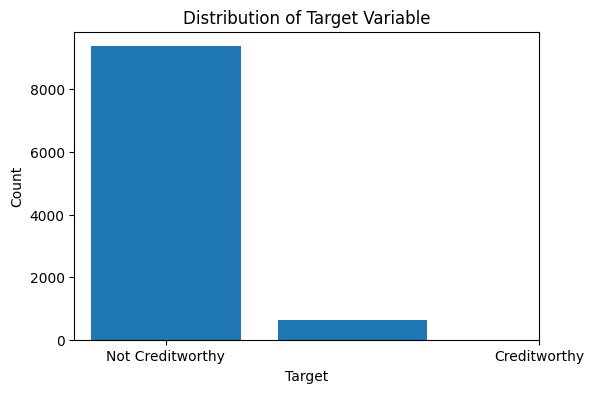

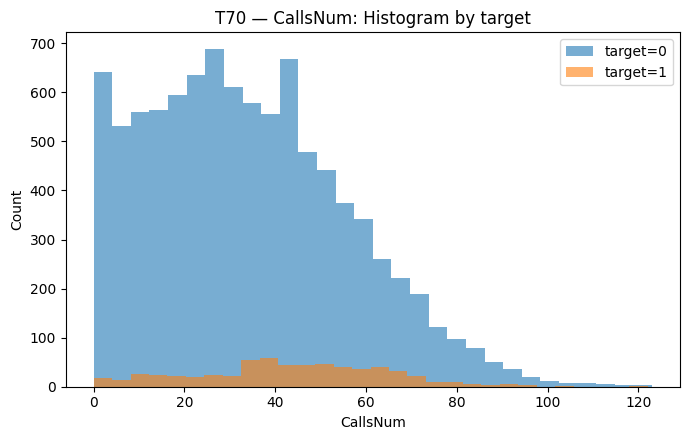

/tmp/ipython-input-1208640416.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


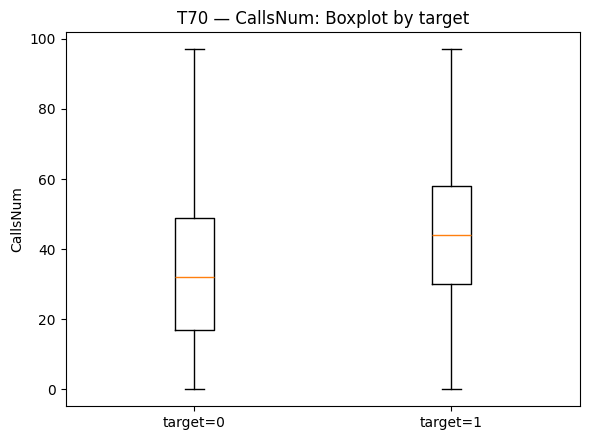

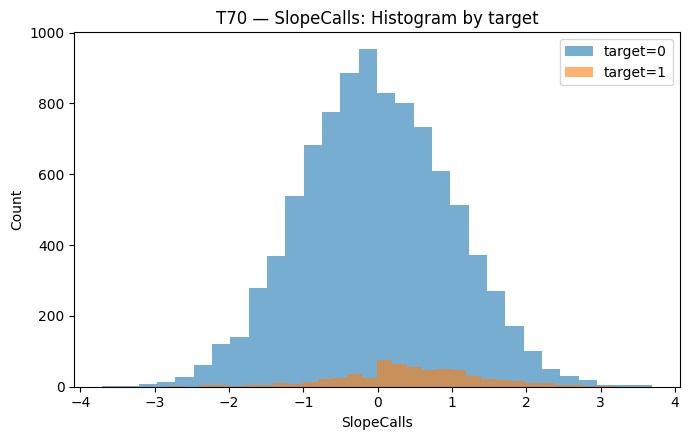

/tmp/ipython-input-1208640416.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


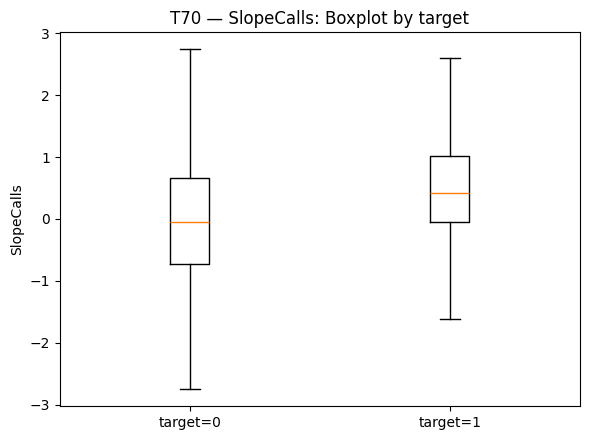

In [78]:
print("Rows:", len(df), "| target share:", round(float(df_T70["target"].mean()), 4))
plt.figure(figsize=(6, 4))
plt.hist(df_T70['target'], bins=2, align='left', rwidth=0.8)
plt.xticks([0, 1], ['Not Creditworthy', 'Creditworthy'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

calls = ["CallsNum", "SlopeCalls"]
for feature in calls:
    # Get data by target
    x0 = df_T70.loc[df_T70["target"]==0, feature].dropna()
    x1 = df_T70.loc[df_T70["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T70 — {feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T70 — {feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()




### EDA for transaction related features

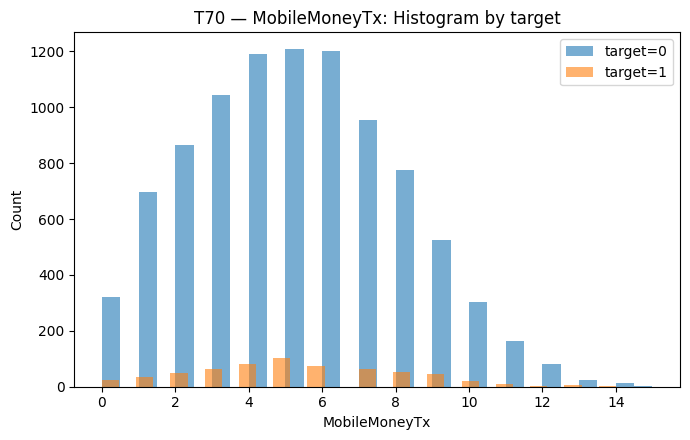

/tmp/ipython-input-4006099215.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


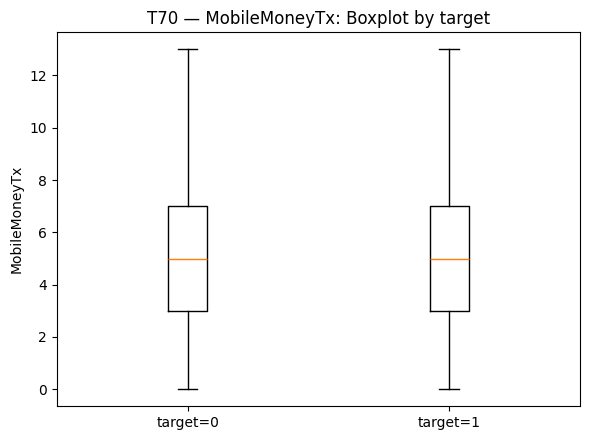

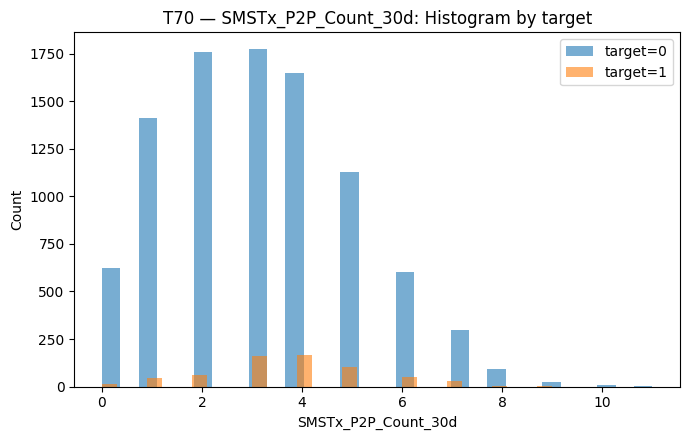

/tmp/ipython-input-4006099215.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


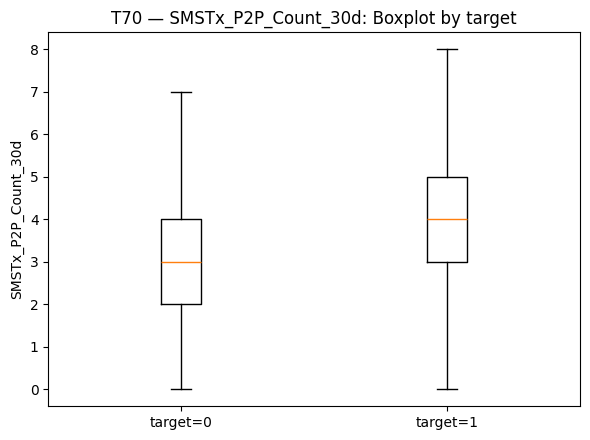

In [79]:
tx = ["MobileMoneyTx", "SMSTx_P2P_Count_30d"]
for feature in tx:
    # Get data by target
    x0 = df_T70.loc[df_T70["target"]==0, feature].dropna()
    x1 = df_T70.loc[df_T70["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T70 — {feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T70 — {feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()



### EDA for social behaviour related features

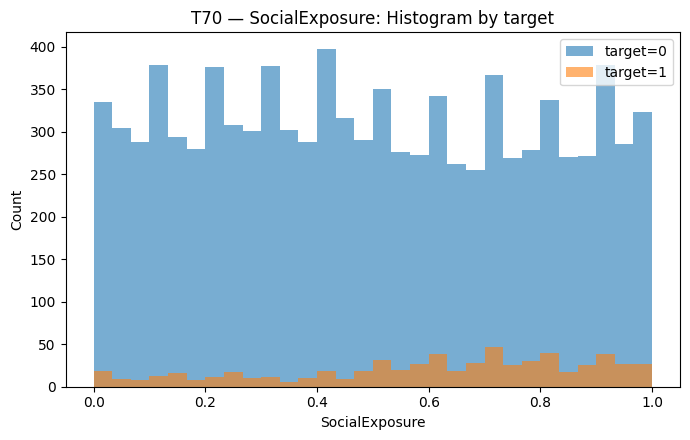

/tmp/ipython-input-1178388594.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


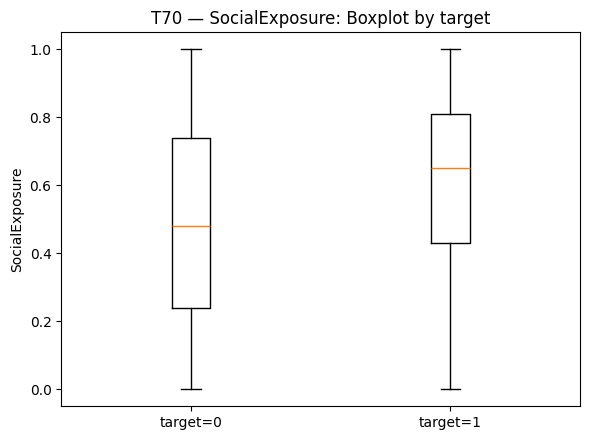

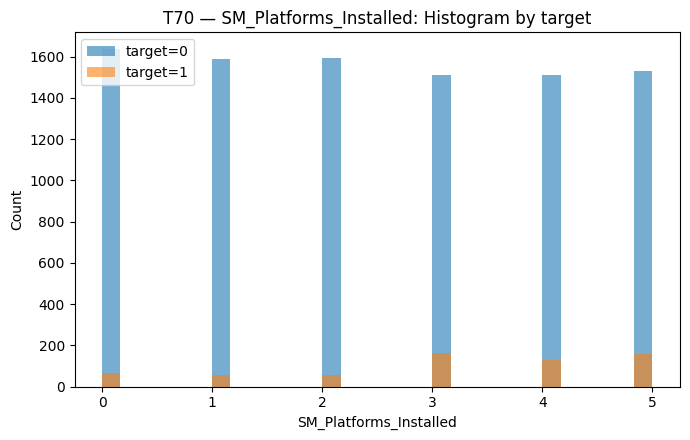

/tmp/ipython-input-1178388594.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)


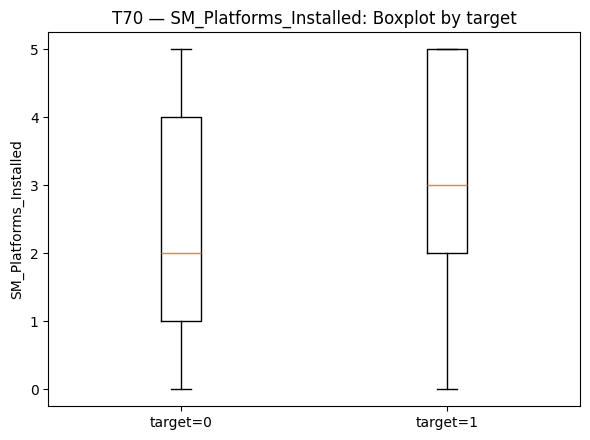

In [80]:
social = ["SocialExposure", "SM_Platforms_Installed"]
for feature in social:
    # Get data by target
    x0 = df_T70.loc[df_T70["target"]==0, feature].dropna()
    x1 = df_T70.loc[df_T70["target"]==1, feature].dropna()

    # Histogram
    plt.figure(figsize=(7,4.5))
    plt.hist(x0, bins=30, alpha=0.6, label="target=0")
    plt.hist(x1, bins=30, alpha=0.6, label="target=1")
    plt.title(f"T70 — {feature}: Histogram by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4.5))
    plt.boxplot([x0, x1], labels=["target=0","target=1"], showfliers=False)
    plt.title(f"T70 — {feature}: Boxplot by target")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### HeatMap

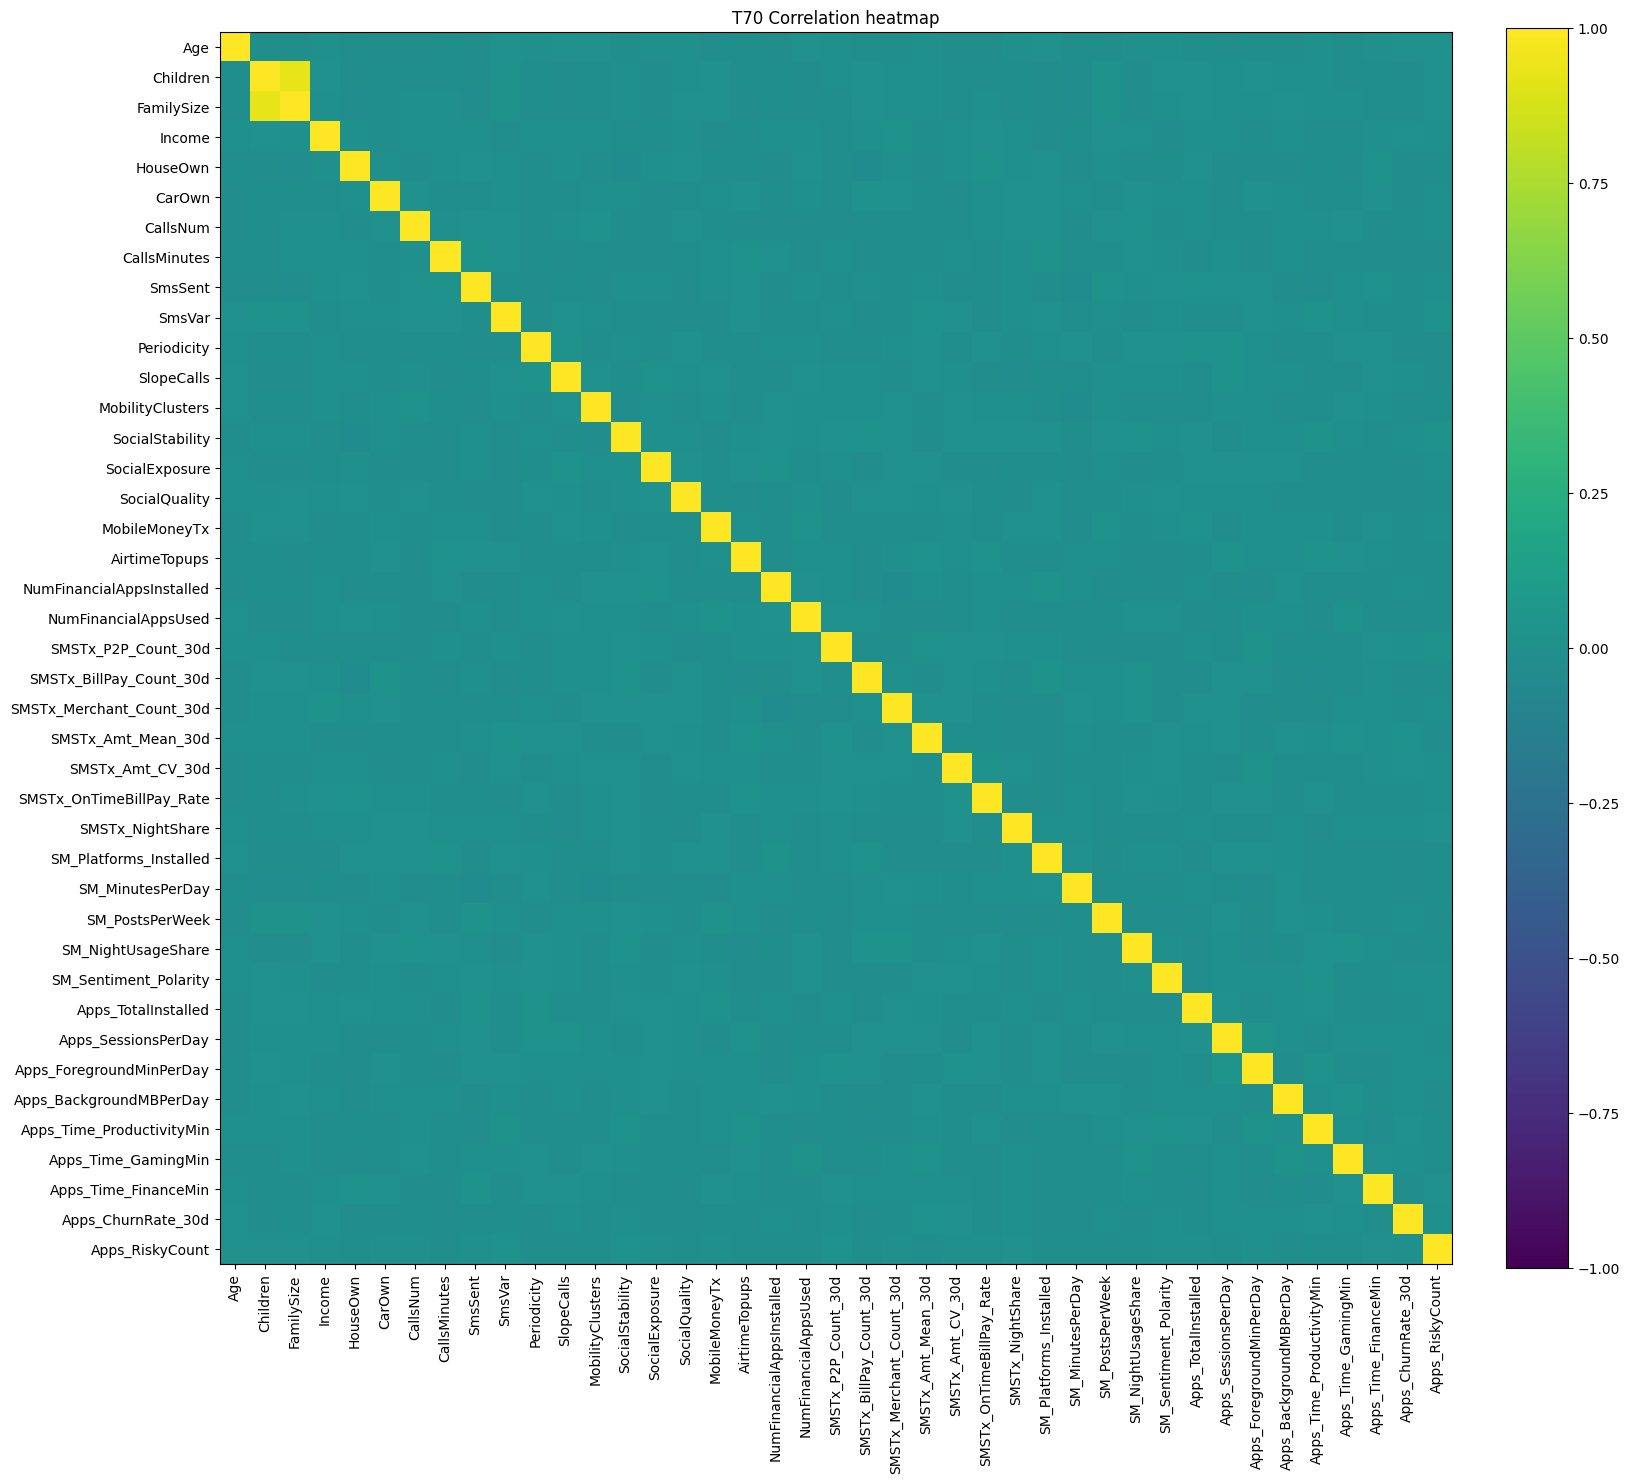

In [81]:
# Correlation heatmap
corr = df_T70.drop(columns=["target",'Target(Creditworthy)', 'drivers_pos_count',
             'drivers_neg_count', 'drivers_pos_ratio', 'drivers_positive_features',
             'drivers_negative_features', 'adj_pos_ratio_T70', 'target_T70']).select_dtypes(include=[np.number]).corr()
# corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(max(8, 0.4*len(corr.columns)), max(6, 0.4*len(corr.columns))))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.title("T70 Correlation heatmap")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout(); plt.show()

# Spilitting the data

In [82]:

y = df_T70['target'].astype(int)

# Drop unwanted columns
drop_cols = ['target', 'Target(Creditworthy)', 'drivers_pos_count',
             'drivers_neg_count', 'drivers_pos_ratio', 'drivers_positive_features',
             'drivers_negative_features', 'adj_pos_ratio_T70', 'target_T70','FullName',
             'Email','Phone','Address','JobTitle','DateOfBirth','Age','Gender','Marriage',
             'Children','FamilySize','Education','Income','HouseOwn','CarOwn']
X = df_T70.drop(columns=[col for col in drop_cols if col in df_T70.columns])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Model Implementation For T70

### MLP

In [83]:
# Pipeline
pipeline_MLP_T70 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(132, 64, 32),activation="relu",solver="adam",alpha=3,max_iter=1000,early_stopping=True, verbose=True, random_state=42,))
])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train and evaluate
pipeline_MLP_T70.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline_MLP_T70.predict(X_test)
y_proba = pipeline_MLP_T70.predict_proba(X_test)[:, 1]  # Probability of good credit

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Iteration 1, loss = 1.49826202
Validation score: 0.876000
Iteration 2, loss = 0.81079365
Validation score: 0.909333
Iteration 3, loss = 0.53568206
Validation score: 0.931333
Iteration 4, loss = 0.40825411
Validation score: 0.942000
Iteration 5, loss = 0.34852503
Validation score: 0.955333
Iteration 6, loss = 0.31748639
Validation score: 0.954667
Iteration 7, loss = 0.29948500
Validation score: 0.957333
Iteration 8, loss = 0.28914838
Validation score: 0.959333
Iteration 9, loss = 0.28023492
Validation score: 0.959333
Iteration 10, loss = 0.27693784
Validation score: 0.962000
Iteration 11, loss = 0.27032238
Validation score: 0.958667
Iteration 12, loss = 0.26782704
Validation score: 0.965333
Iteration 13, loss = 0.26713823
Validation score: 0.962000
Iteration 14, loss = 0.26406510
Validation score: 0.964667
Iteration 15, loss = 0.26255109
Validation score: 0.964000
Iteration 16, loss = 0.26148172
Validation score: 0.958000
Iteration 17, loss = 0.26034713
Validation score: 0.964667
Iterat

In [84]:
mlp_acc = accuracy_score(y_test, y_pred);
mlp_auc = roc_auc_score(y_test, y_proba);
mlp_p = y_proba;
mlp_y = y_test.reset_index(drop=True)

### Logistic Regression

In [85]:
# Pipeline - Removed SMOTE from pipeline
pipeline_LR_T70 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate
pipeline_LR_T70.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline_LR_T70.predict(X_test)
y_proba = pipeline_LR_T70.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.8270
ROC-AUC: 0.9033

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1874
           1       0.25      0.86      0.38       126

    accuracy                           0.83      2000
   macro avg       0.62      0.84      0.64      2000
weighted avg       0.94      0.83      0.87      2000



In [86]:
lr_acc = accuracy_score(y_test, y_pred);
lr_auc = roc_auc_score(y_test, y_proba);
lr_p = y_proba;
lr_y = y_test.reset_index(drop=True)

### Random Forest

In [87]:
# Pipeline - Removed SMOTE from pipeline
pipeline_RF_T70 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))
])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pipeline_RF_T70.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline_RF_T70.predict(X_test)
y_proba = pipeline_RF_T70.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.9525
ROC-AUC: 0.9458

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1874
           1       0.74      0.38      0.50       126

    accuracy                           0.95      2000
   macro avg       0.85      0.69      0.74      2000
weighted avg       0.95      0.95      0.95      2000



In [88]:
rf_acc = accuracy_score(y_test, y_pred);
rf_auc = roc_auc_score(y_test, y_proba);
rf_p = y_proba;
rf_y = y_test.reset_index(drop=True)

### Gradient Boost

In [89]:
# Pipeline - Removed SMOTE from pipeline
pipeline_GB_T70 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pipeline_GB_T70.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline_GB_T70.predict(X_test)
y_proba = pipeline_GB_T70.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.9380
ROC-AUC: 0.9732

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1874
           1       0.50      0.89      0.64       126

    accuracy                           0.94      2000
   macro avg       0.75      0.92      0.80      2000
weighted avg       0.96      0.94      0.95      2000



In [90]:
gb_acc = accuracy_score(y_test, y_pred);
gb_auc = roc_auc_score(y_test, y_proba);
gb_p = y_proba;
gb_y = y_test.reset_index(drop=True)

###SVC

In [91]:
# Pipeline - Removed SMOTE from pipeline
pipeline_SVC_T70 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pipeline_SVC_T70.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline_SVC_T70.predict(X_test)
y_proba = pipeline_SVC_T70.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.9300
ROC-AUC: 0.9154

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1874
           1       0.44      0.38      0.41       126

    accuracy                           0.93      2000
   macro avg       0.70      0.67      0.68      2000
weighted avg       0.93      0.93      0.93      2000



In [92]:
svc_acc = accuracy_score(y_test, y_pred);
svc_auc = roc_auc_score(y_test, y_proba);
svc_p = y_proba;
svc_y = y_test.reset_index(drop=True)

### KNN


In [93]:
# Pipeline - Removed SMOTE from pipeline
pipeline_KNN_T70 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=15))
])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pipeline_KNN_T70.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline_KNN_T70.predict(X_test)
y_proba = pipeline_KNN_T70.predict_proba(X_test)[:, 1]

print(f"Features: {X.shape[1]} | Test samples: {len(y_test)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Features: 35 | Test samples: 2000
Accuracy: 0.3410
ROC-AUC: 0.8027

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46      1874
           1       0.09      0.98      0.16       126

    accuracy                           0.34      2000
   macro avg       0.54      0.64      0.31      2000
weighted avg       0.94      0.34      0.44      2000



In [94]:
knn_acc = accuracy_score(y_test, y_pred);
knn_auc = roc_auc_score(y_test, y_proba);
knn_p = y_proba;
knn_y = y_test.reset_index(drop=True)

# Comparing all the models


=== T70 model comparison ===
        Model  Accuracy  ROC_AUC
GradientBoost    0.9380 0.973171
 RandomForest    0.9525 0.945762
          SVC    0.9300 0.915434
          MLP    0.9170 0.911491
       LogReg    0.8270 0.903343
          KNN    0.3410 0.802686


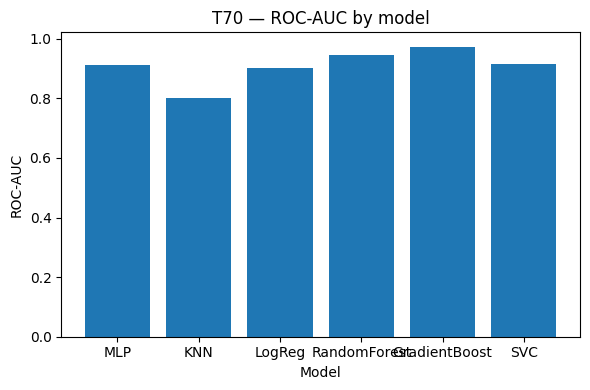

Best model: GradientBoost

Preview (winner predictions):
 y_true   p_good  score_300_900
      0 0.038045     393.919063
      0 0.341588     468.188267
      0 0.042443     397.207968
      0 0.054894     405.007941
      0 0.058478     406.942245
      0 0.102249     424.438455
      0 0.122933     430.426559
      0 0.018507     372.546117
      0 0.239398     453.768283
      0 0.278971     459.724105

=== SHAP Analysis for GradientBoost Model (T70) ===


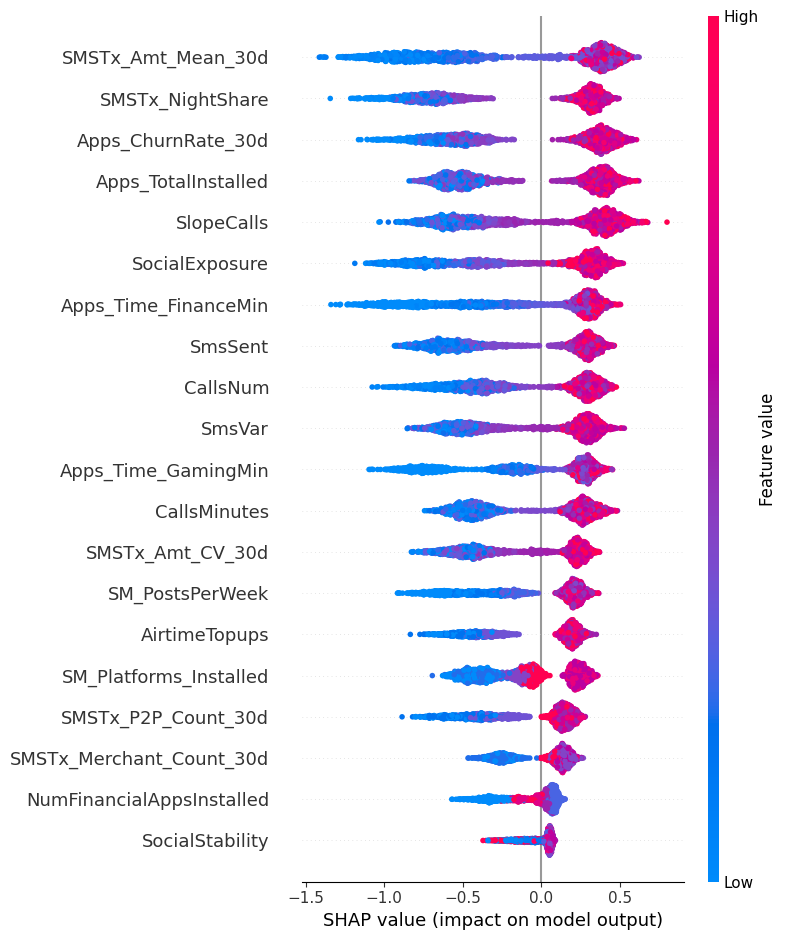


Most important feature (from SHAP): SMSTx_Amt_Mean_30d


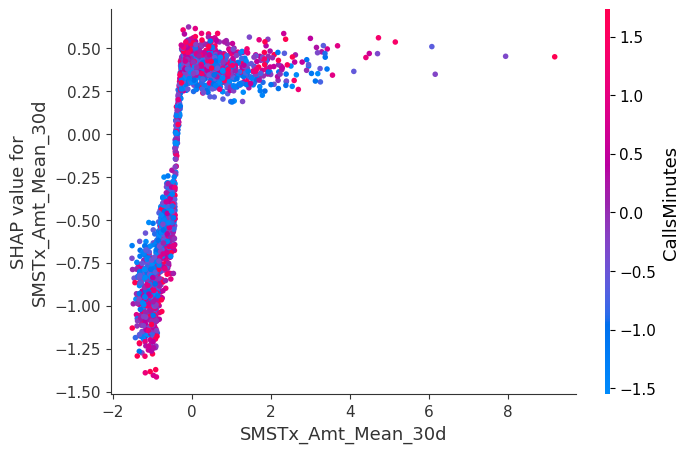


Top 10 most important features:
SMSTx_Amt_Mean_30d      0.548772
SMSTx_NightShare        0.510622
Apps_ChurnRate_30d      0.479922
Apps_TotalInstalled     0.445472
SlopeCalls              0.441415
SocialExposure          0.441261
Apps_Time_FinanceMin    0.439078
SmsSent                 0.424443
CallsNum                0.385300
SmsVar                  0.372549
dtype: float64


In [98]:
import shap

# ComparING
comp = pd.DataFrame({
    "Model": ["MLP","KNN","LogReg","RandomForest","GradientBoost","SVC"],
    "Accuracy": [mlp_acc, knn_acc, lr_acc, rf_acc, gb_acc, svc_acc],
    "ROC_AUC": [mlp_auc, knn_auc, lr_auc, rf_auc, gb_auc, svc_auc]
})
print("\n=== T70 model comparison ===")
print(comp.sort_values("ROC_AUC", ascending=False).reset_index(drop=True).to_string(index=False))

# Bar chart (ROC-AUC)
plt.figure(figsize=(6,4))
plt.bar(comp["Model"], comp["ROC_AUC"])
plt.title("T70 — ROC-AUC by model")
plt.ylabel("ROC-AUC"); plt.xlabel("Model")
plt.tight_layout(); plt.show()

# Picking best model by ROC-AUC
best_idx  = comp["ROC_AUC"].idxmax()
best_name = comp.loc[best_idx, "Model"]
print("Best model:", best_name)

# Get the best pipeline based on the best model name
if best_name=="MLP":
    best_pipeline = pipeline_MLP_T70
    p_good, y_true = mlp_p, mlp_y
elif best_name=="KNN":
    best_pipeline = pipeline_KNN_T70
    p_good, y_true = knn_p, knn_y
elif best_name=="LogReg":
    best_pipeline = pipeline_LR_T70
    p_good, y_true = lr_p, lr_y
elif best_name=="RandomForest":
    best_pipeline = pipeline_RF_T70
    p_good, y_true = rf_p, rf_y
elif best_name=="GradientBoost":
    best_pipeline = pipeline_GB_T70
    p_good, y_true = gb_p, gb_y
else:
    best_pipeline = pipeline_SVC_T70
    p_good, y_true = svc_p, svc_y


p_good = np.clip(p_good, 1e-9, 1-1e-9)

# PDO mapping
PDO, BASE_SCORE, BASE_ODDS = 20, 600, 50
factor = PDO / np.log(2.0)
offset = BASE_SCORE - factor * np.log(BASE_ODDS)
odds   = p_good / (1 - p_good)
score  = np.clip(offset + factor * np.log(odds), 300, 900)

preds = pd.DataFrame({"y_true": y_true, "p_good": p_good, "score_300_900": score})
print("\nPreview (winner predictions):")
print(preds.head(10).to_string(index=False))

# SHAP analysis for the best model
print(f"\n=== SHAP Analysis for {best_name} Model (T70) ===")
# Create a SHAP explainer
# Use the trained pipeline to transform the data before passing to SHAP
explainer = shap.Explainer(best_pipeline.named_steps['clf'], best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_train_resampled)))

# Calculate SHAP values
shap_values = explainer(best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)))

# Generate SHAP summary plot
shap.summary_plot(shap_values, best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)), feature_names=X_test.columns)

# Generate SHAP dependence plot for the most important feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.Series(mean_abs_shap_values, index=X_test.columns)
most_important_feature = feature_importance.idxmax()
print(f"\nMost important feature (from SHAP): {most_important_feature}")
shap.dependence_plot(most_important_feature, shap_values.values, best_pipeline.named_steps['scale'].transform(best_pipeline.named_steps['impute'].transform(X_test)), feature_names=X_test.columns)
# See feature importance ranking
print("\nTop 10 most important features:")
print(feature_importance.sort_values(ascending=False).head(10))